x_train:  tensor([[ 6.6816e-01,  8.5776e-01,  9.7560e-01,  1.0000e+00],
        [ 8.5776e-01,  9.7560e-01,  1.0000e+00,  9.2138e-01],
        [ 9.7560e-01,  1.0000e+00,  9.2138e-01,  7.4363e-01],
        [ 1.0000e+00,  9.2138e-01,  7.4363e-01,  4.8366e-01],
        [ 9.2138e-01,  7.4363e-01,  4.8366e-01,  1.6928e-01],
        [ 7.4363e-01,  4.8366e-01,  1.6928e-01, -1.6446e-01],
        [ 4.8366e-01,  1.6928e-01, -1.6446e-01, -4.7988e-01],
        [ 1.6928e-01, -1.6446e-01, -4.7988e-01, -7.4154e-01],
        [-1.6446e-01, -4.7988e-01, -7.4154e-01, -9.2091e-01],
        [-4.7988e-01, -7.4154e-01, -9.2091e-01, -1.0000e+00],
        [-7.4154e-01, -9.2091e-01, -1.0000e+00, -9.7361e-01],
        [-9.2091e-01, -1.0000e+00, -9.7361e-01, -8.4987e-01],
        [-1.0000e+00, -9.7361e-01, -8.4987e-01, -6.4894e-01],
        [-9.7361e-01, -8.4987e-01, -6.4894e-01, -4.0027e-01],
        [-8.4987e-01, -6.4894e-01, -4.0027e-01, -1.3850e-01],
        [-6.4894e-01, -4.0027e-01, -1.3850e-01,  1.0114e-01]

CALCULATING LOSS...
LOSS AVG:  tensor(0.0507, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  3.273533821105957
CALCULATING LOSS...
LOSS AVG:  tensor(0.0838, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  2.5495808124542236
CALCULATING LOSS...
LOSS AVG:  tensor(0.0556, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  2.5132596492767334
CALCULATING LOSS...
LOSS AVG:  tensor(0.0743, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  2.5951080322265625
CALCULATING LOSS...
LOSS AVG:  tensor(0.0973, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  2.630419969558716
CALCULATING LOSS...
LOSS AVG:  tensor(0.0416, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  2.4778878688812256
CALCULATING LOSS...
LOSS AVG:  tensor(0.0708, dtype=torch.float64, grad_fn=<MseLossBackwar

LOSS AVG:  tensor(0.0078, dtype=torch.float64, grad_fn=<MseLossBackward0>)
TEST LOSS:  tensor(0.0078, dtype=torch.float64, grad_fn=<MseLossBackward0>)
CALCULATING LOSS...
LOSS AVG:  tensor(0.0275, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  4.454060077667236
CALCULATING LOSS...
LOSS AVG:  tensor(0.0197, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  5.649909019470215
CALCULATING LOSS...
LOSS AVG:  tensor(0.0426, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  5.034951210021973
CALCULATING LOSS...
LOSS AVG:  tensor(0.0115, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  17.13825511932373
CALCULATING LOSS...
LOSS AVG:  tensor(0.0233, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  5.270808696746826
CALCULATING LOSS...
LOSS AVG:  tensor(0.0535, dtype=torch.float64, grad_fn=<MseLossBackward0>)

KeyboardInterrupt: 

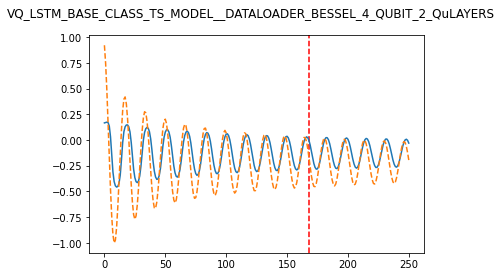

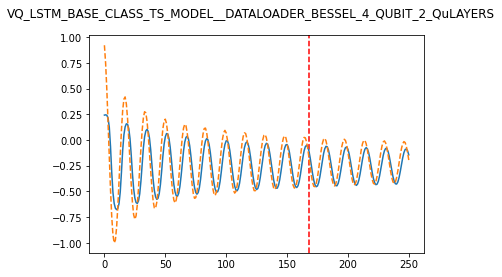

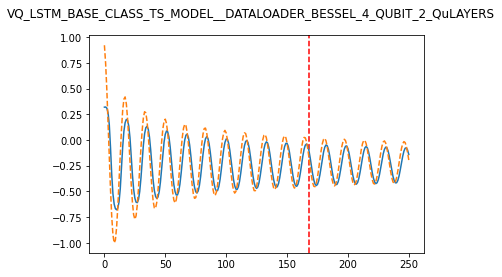

In [5]:
import matplotlib.pyplot as plt

# Saving
import pickle

# Datetime
from datetime import datetime

# PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
# from torch.optim import lr_scheduler
# import torchvision
# from torchvision import datasets, models, transforms

# Pennylane
import pennylane as qml
from pennylane import numpy as np

# sklearn
from sklearn.preprocessing import StandardScaler

# Other tools
import time
import os
import copy

# from VQC_GRAD_META_CONSTRUCT import load_JET_4_var_two

from metaquantum.CircuitComponents import *
from metaquantum import Optimization

# Qiskit
import qiskit
import qiskit.providers.aer.noise as noise

# Custom qiskit noise model
#from ibm_noise_models import thermal_noise_backend, combined_error_noisy_backend, combined_noise_backend_normdist


# Dataset
# from generate_lstm_dataset import get_sine_data
# from data.load_air_passengers import get_air_passenger_data_single_predict
# from data.damped_shm import get_damped_shm_data
from data.bessel_functions import get_bessel_data
# from data.delayed_quantum_control import get_delayed_quantum_control_data
# from data.population_inversion_revised import get_population_inversion_data
# from generate_lstm_dataset import get_sine_data_single_predict
# from data.narma_data_set import get_narma2_data
# from data.narma_generator import get_narma_data

##
# Device auto select
# dtype = torch.cuda.DoubleTensor if torch.cuda.is_available() else torch.DoubleTensor
# device = 'cuda' if torch.cuda.is_available() else 'cpu'


from lstm_base_class import VQLSTM
from lstm_federated_data_prepare import TimeSeriesDataSet


## Training
def MSEcost(VQC, X, Y, h_0, c_0, seq_len):
	"""Cost (error) function to be minimized."""

	# predictions = torch.stack([variational_classifier(var_Q_circuit = var_Q_circuit, var_Q_bias = var_Q_bias, angles=item) for item in X])

	loss = nn.MSELoss()
	output = loss(torch.stack([VQC.forward(vec.reshape(seq_len,1), h_0, c_0).reshape(1,) for vec in X]), Y.reshape(Y.shape[0],1))
	print("LOSS AVG: ",output)
	return output

def train_epoch_full(opt, VQC, data, h_0, c_0, seq_len, batch_size):
	losses = []
	time_series_data_loader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True)

	for X_train_batch, Y_train_batch in time_series_data_loader:

		since_batch = time.time()
		opt.zero_grad()
		print("CALCULATING LOSS...")
		loss = MSEcost(VQC = VQC, X = X_train_batch, Y = Y_train_batch, h_0 = h_0, c_0 = c_0, seq_len = seq_len)
		print("BACKWARD..")
		loss.backward()
		losses.append(loss.data.cpu().numpy())
		opt.step()
# 		print("LOSS IN CLOSURE: ", loss)
		print("FINISHED OPT.")
		print("Batch time: ", time.time() - since_batch)

	losses = np.array(losses)
	return losses.mean()


def saving(exp_name, exp_index, train_len, iteration_list, train_loss_list, test_loss_list, model, simulation_result, ground_truth):
	file_name = exp_name + "_NO_" + str(exp_index) + "_Epoch_" + str(iteration_list[-1])
	saved_simulation_truth = {
	"simulation_result" : simulation_result,
	"ground_truth" : ground_truth
	}

	if not os.path.exists(exp_name):
		os.makedirs(exp_name)

	# Save the train loss list
	with open(exp_name + "/" + file_name + "_TRAINING_LOST" + ".txt", "wb") as fp:
		pickle.dump(train_loss_list, fp)

	# Save the test loss list
	with open(exp_name + "/" + file_name + "_TESTING_LOST" + ".txt", "wb") as fp:
		pickle.dump(test_loss_list, fp)

	# Save the simulation result
	with open(exp_name + "/" + file_name + "_SIMULATION_RESULT" + ".txt", "wb") as fp:
		pickle.dump(saved_simulation_truth, fp)

	# Save the model parameters
	torch.save(model.state_dict(), exp_name + "/" +  file_name + "_torch_model.pth")

	# Plot
	plotting_data(exp_name, exp_index, file_name, iteration_list, train_loss_list, test_loss_list)
	plotting_simulation(exp_name, exp_index, file_name, train_len, simulation_result, ground_truth)

	return


def plotting_data(exp_name, exp_index, file_name, iteration_list, train_loss_list, test_loss_list):
	# Plot train and test loss
	fig, ax = plt.subplots()
	# plt.yscale('log')
	ax.plot(iteration_list, train_loss_list, '-b', label='Training Loss')
	ax.plot(iteration_list, test_loss_list, '-r', label='Testing Loss')
	leg = ax.legend();

	ax.set(xlabel='Epoch', 
		   title=exp_name)
	fig.savefig(exp_name + "/" + file_name + "_" + "loss" + "_"+ datetime.now().strftime("NO%Y%m%d%H%M%S") + ".pdf", format='pdf')
	plt.clf()

	return

def plotting_simulation(exp_name, exp_index, file_name, train_len, simulation_result, ground_truth):
	# Plot the simulation
	plt.axvline(x=train_len, c='r', linestyle='--')
	plt.plot(simulation_result, '-')
	plt.plot(ground_truth.detach().numpy(), '--')
	plt.suptitle(exp_name)
	# savfig can only be placed BEFORE show()
	plt.savefig(exp_name + "/" + file_name + "_" + "simulation" + "_"+ datetime.now().strftime("NO%Y%m%d%H%M%S") + ".pdf", format='pdf')
	return

#



def main():

	dtype = torch.DoubleTensor
	device = 'cpu'


	qdevice = "default.qubit" 
	# qdevice = "qulacs.simulator"

	# gpu_q = True
	gpu_q = False

	##
	duplicate_time_of_input = 1

	lstm_input_size = 1
	lstm_hidden_size = 3
	lstm_cell_cat_size = lstm_input_size + lstm_hidden_size
	lstm_internal_size = 4
	lstm_output_size = 4  
	lstm_cell_num_layers = 2 
	lstm_num_qubit = 4

	as_reservoir = False

	use_qiskit_noise_model = False


	dev = None

	if use_qiskit_noise_model:
		noise_model = combined_noise_backend_normdist(num_qubits = lstm_num_qubit)
		dev = qml.device('qiskit.aer', wires=lstm_num_qubit, noise_model=noise_model)

	else:
		dev = qml.device("default.qubit", wires = lstm_num_qubit)


	# Initialize the model
	model = VQLSTM(lstm_input_size = lstm_input_size, 
		lstm_hidden_size = lstm_hidden_size,
		lstm_output_size = lstm_output_size,
		lstm_num_qubit = lstm_num_qubit,
		lstm_cell_cat_size = lstm_cell_cat_size,
		lstm_cell_num_layers = lstm_cell_num_layers,
		lstm_internal_size = lstm_internal_size,
		duplicate_time_of_input = duplicate_time_of_input,
		as_reservoir = as_reservoir,
		single_y = True,
		output_all_h = False,
		qdevice = qdevice,
		dev = dev,
		gpu_q = gpu_q).double()

	# Load the data

	x, y = get_bessel_data()

	num_for_train_set = int(0.67 * len(x))

	x_train = x[:num_for_train_set].type(dtype)
	y_train = y[:num_for_train_set].type(dtype)

	train_data = TimeSeriesDataSet(x_train, y_train)

	x_test = x[num_for_train_set:].type(dtype)
	y_test = y[num_for_train_set:].type(dtype)

	test_data = TimeSeriesDataSet(x_test, y_test)

	print("x_train: ", x_train)
	print("x_test: ", x_test)


	h_0 = torch.zeros(lstm_hidden_size,).type(dtype)
	c_0 = torch.zeros(lstm_internal_size,).type(dtype)

	print("First data: ", x_train[0])
	print("First target: ", y_train[0])
	# first_run_h, first_run_c = model.forward(x_train[0].reshape(4,1), h_0, c_0)
	first_run = model.forward(x_train[0].reshape(4,1), h_0, c_0)
	# print("Output of first_run_h: ", first_run_h)
	# print("Output of first_run_c: ", first_run_c)


	exp_name = "VQ_LSTM_BASE_CLASS_TS_MODEL__DATALOADER_BESSEL_{}_QUBIT".format(lstm_num_qubit)


	if as_reservoir:
		exp_name += "_AS_RESERVOIR"

	if use_qiskit_noise_model:
		exp_name += "_QISKIT_NOISE"


	exp_name += "_{}_QuLAYERS".format(lstm_cell_num_layers)

	exp_index = 2
	train_len = len(x_train)

	opt = torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.99, eps=1e-08, weight_decay=0, momentum=0, centered=False)
	train_loss_for_all_epoch = []
	test_loss_for_all_epoch = []
	iteration_list = []
	for i in range(100):
        print(f'Epoch {i+1}')
		iteration_list.append(i + 1)
		c_0 = torch.zeros(lstm_internal_size,).type(dtype)
		h_0 = torch.zeros(lstm_hidden_size,).type(dtype)


		train_loss_epoch = train_epoch_full(opt = opt, VQC = model, data = train_data, h_0 = h_0, c_0 = c_0, seq_len = 4,batch_size = 10)
		print("c_0: ", c_0)
		print("h_0: ", h_0)
		test_loss = MSEcost(VQC = model, X = x_test, Y = y_test, h_0 = h_0, c_0 = c_0, seq_len = 4)
		print("TEST LOSS: ", test_loss)

		# train_loss_for_all_epoch.append(train_loss_epoch)
		# test_loss_for_all_epoch.append(test_loss)
		train_loss_for_all_epoch.append(train_loss_epoch.numpy())
		test_loss_for_all_epoch.append(test_loss.detach().numpy())

		plot_each_epoch = True
		if plot_each_epoch == True:
			total_res = None
			ground_truth_y = None
			if device == 'cuda':
				total_res = torch.stack([model.forward(vec.reshape(4,1), h_0, c_0).reshape(1,) for vec in x.type(dtype)]).detach().cpu().numpy()
				ground_truth_y = y.clone().detach().cpu()
			else:
				total_res = torch.stack([model.forward(vec.reshape(4,1), h_0, c_0).reshape(1,) for vec in x.type(dtype)]).detach().numpy()
				ground_truth_y = y.clone().detach()

			saving(
				exp_name = exp_name, 
				exp_index = exp_index, 
				train_len = train_len, 
				iteration_list = iteration_list, 
				train_loss_list = train_loss_for_all_epoch, 
				test_loss_list = test_loss_for_all_epoch, 
				model = model, 
				simulation_result = total_res, 
				ground_truth = ground_truth_y)

	return




if __name__ == '__main__':
	main()

# Trying with our data (reservoir)

torch.Size([572, 4, 1]) torch.Size([144, 4, 1])
torch.Size([572, 1]) torch.Size([144, 1])
torch.Size([716, 4, 1]) torch.Size([716, 1])
x_train:  tensor([[[-0.7090],
         [-0.6751],
         [-0.6356],
         [-0.5791]],

        [[-0.6751],
         [-0.6356],
         [-0.5791],
         [-0.5791]],

        [[-0.6356],
         [-0.5791],
         [-0.5791],
         [-0.5847]],

        ...,

        [[-0.1186],
         [-0.0593],
         [-0.1610],
         [-0.1045]],

        [[-0.0593],
         [-0.1610],
         [-0.1045],
         [-0.0989]],

        [[-0.1610],
         [-0.1045],
         [-0.0989],
         [-0.0734]]], dtype=torch.float64)
x_test:  tensor([[[-0.1045],
         [-0.0989],
         [-0.0734],
         [-0.1243]],

        [[-0.0989],
         [-0.0734],
         [-0.1243],
         [-0.0791]],

        [[-0.0734],
         [-0.1243],
         [-0.0791],
         [-0.0141]],

        [[-0.1243],
         [-0.0791],
         [-0.0141],
         [ 0.

LOSS AVG:  tensor(0.9454, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.49832916259765625
CALCULATING LOSS...
LOSS AVG:  tensor(1.1600, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.45713090896606445
CALCULATING LOSS...
LOSS AVG:  tensor(0.4868, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4850318431854248
CALCULATING LOSS...
LOSS AVG:  tensor(0.5229, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.43970203399658203
CALCULATING LOSS...
LOSS AVG:  tensor(0.3951, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.43062400817871094
CALCULATING LOSS...
LOSS AVG:  tensor(0.5222, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.43505215644836426
CALCULATING LOSS...
LOSS AVG:  tensor(0.4392, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD

LOSS AVG:  tensor(0.1513, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4330477714538574
CALCULATING LOSS...
LOSS AVG:  tensor(0.1884, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.42787790298461914
CALCULATING LOSS...
LOSS AVG:  tensor(0.1665, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.43935704231262207
CALCULATING LOSS...
LOSS AVG:  tensor(0.0488, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.08551597595214844
c_0:  tensor([0., 0., 0., 0.], dtype=torch.float64)
h_0:  tensor([0., 0., 0.], dtype=torch.float64)
LOSS AVG:  tensor(0.0258, dtype=torch.float64, grad_fn=<MseLossBackward0>)
TEST LOSS:  tensor(0.0258, dtype=torch.float64, grad_fn=<MseLossBackward0>)

Epoch 2
CALCULATING LOSS...
LOSS AVG:  tensor(0.0904, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.50924611091613

LOSS AVG:  tensor(0.0766, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.42980504035949707
CALCULATING LOSS...
LOSS AVG:  tensor(0.0340, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.42609095573425293
CALCULATING LOSS...
LOSS AVG:  tensor(0.1357, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4270589351654053
CALCULATING LOSS...
LOSS AVG:  tensor(0.0930, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4312160015106201
CALCULATING LOSS...
LOSS AVG:  tensor(0.0666, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4266061782836914
CALCULATING LOSS...
LOSS AVG:  tensor(0.0448, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4258277416229248
CALCULATING LOSS...
LOSS AVG:  tensor(0.1365, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..


LOSS AVG:  tensor(0.0174, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4568440914154053
CALCULATING LOSS...
LOSS AVG:  tensor(0.0222, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4399430751800537
CALCULATING LOSS...
LOSS AVG:  tensor(0.0955, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4648468494415283
CALCULATING LOSS...
LOSS AVG:  tensor(0.1273, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.49080395698547363
CALCULATING LOSS...
LOSS AVG:  tensor(0.0748, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.5201060771942139
CALCULATING LOSS...
LOSS AVG:  tensor(0.0254, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4868922233581543
CALCULATING LOSS...
LOSS AVG:  tensor(0.0263, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
F

LOSS AVG:  tensor(0.0844, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.43465185165405273
CALCULATING LOSS...
LOSS AVG:  tensor(0.0387, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44746971130371094
CALCULATING LOSS...
LOSS AVG:  tensor(0.0268, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44108104705810547
CALCULATING LOSS...
LOSS AVG:  tensor(0.0163, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.43547987937927246
CALCULATING LOSS...
LOSS AVG:  tensor(0.0227, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4410257339477539
CALCULATING LOSS...
LOSS AVG:  tensor(0.0152, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.43294692039489746
CALCULATING LOSS...
LOSS AVG:  tensor(0.0208, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD

LOSS AVG:  tensor(0.0213, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.43526577949523926
CALCULATING LOSS...
LOSS AVG:  tensor(0.0058, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4382591247558594
CALCULATING LOSS...
LOSS AVG:  tensor(0.0314, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44042301177978516
CALCULATING LOSS...
LOSS AVG:  tensor(0.0115, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4410831928253174
CALCULATING LOSS...
LOSS AVG:  tensor(0.0121, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44281888008117676
CALCULATING LOSS...
LOSS AVG:  tensor(0.0120, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44098591804504395
CALCULATING LOSS...
LOSS AVG:  tensor(0.0126, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD.

LOSS AVG:  tensor(0.0117, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4406468868255615
CALCULATING LOSS...
LOSS AVG:  tensor(0.0087, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4393448829650879
CALCULATING LOSS...
LOSS AVG:  tensor(0.0676, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44374775886535645
CALCULATING LOSS...
LOSS AVG:  tensor(0.0138, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44317078590393066
CALCULATING LOSS...
LOSS AVG:  tensor(0.0370, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44297289848327637
CALCULATING LOSS...
LOSS AVG:  tensor(0.0297, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.43897294998168945
CALCULATING LOSS...
LOSS AVG:  tensor(0.0103, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD.

LOSS AVG:  tensor(0.0358, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4420039653778076
CALCULATING LOSS...
LOSS AVG:  tensor(0.0096, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44392824172973633
CALCULATING LOSS...
LOSS AVG:  tensor(0.0289, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.5175769329071045
CALCULATING LOSS...
LOSS AVG:  tensor(0.0356, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.46614623069763184
CALCULATING LOSS...
LOSS AVG:  tensor(0.0174, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.49691295623779297
CALCULATING LOSS...
LOSS AVG:  tensor(0.0236, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.5257971286773682
CALCULATING LOSS...
LOSS AVG:  tensor(0.0229, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..

LOSS AVG:  tensor(0.0221, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4418458938598633
CALCULATING LOSS...
LOSS AVG:  tensor(0.0134, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4433422088623047
CALCULATING LOSS...
LOSS AVG:  tensor(0.0259, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44124698638916016
CALCULATING LOSS...
LOSS AVG:  tensor(0.0081, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4468088150024414
CALCULATING LOSS...
LOSS AVG:  tensor(0.0130, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.46455883979797363
CALCULATING LOSS...
LOSS AVG:  tensor(0.0183, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.449383020401001
CALCULATING LOSS...
LOSS AVG:  tensor(0.0035, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
F

LOSS AVG:  tensor(0.0190, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44125986099243164
CALCULATING LOSS...
LOSS AVG:  tensor(0.0027, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.443983793258667
CALCULATING LOSS...
LOSS AVG:  tensor(0.0196, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4538838863372803
CALCULATING LOSS...
LOSS AVG:  tensor(0.0320, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4581179618835449
CALCULATING LOSS...
LOSS AVG:  tensor(0.0166, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4503810405731201
CALCULATING LOSS...
LOSS AVG:  tensor(0.0079, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.46135568618774414
CALCULATING LOSS...
LOSS AVG:  tensor(0.0243, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
F

LOSS AVG:  tensor(0.0094, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4536099433898926
CALCULATING LOSS...
LOSS AVG:  tensor(0.0094, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.47304391860961914
CALCULATING LOSS...
LOSS AVG:  tensor(0.0241, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.5290510654449463
CALCULATING LOSS...
LOSS AVG:  tensor(0.0304, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.5176608562469482
CALCULATING LOSS...
LOSS AVG:  tensor(0.0051, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4429161548614502
CALCULATING LOSS...
LOSS AVG:  tensor(0.0099, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44430017471313477
CALCULATING LOSS...
LOSS AVG:  tensor(0.0081, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..


LOSS AVG:  tensor(0.0117, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4428708553314209
CALCULATING LOSS...
LOSS AVG:  tensor(0.0155, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44277310371398926
CALCULATING LOSS...
LOSS AVG:  tensor(0.0209, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44223594665527344
CALCULATING LOSS...
LOSS AVG:  tensor(0.0404, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4417722225189209
CALCULATING LOSS...
LOSS AVG:  tensor(0.0131, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4418048858642578
CALCULATING LOSS...
LOSS AVG:  tensor(0.0051, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44430994987487793
CALCULATING LOSS...
LOSS AVG:  tensor(0.0130, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..

LOSS AVG:  tensor(0.0115, dtype=torch.float64, grad_fn=<MseLossBackward0>)
TEST LOSS:  tensor(0.0115, dtype=torch.float64, grad_fn=<MseLossBackward0>)

Epoch 12
CALCULATING LOSS...
LOSS AVG:  tensor(0.0092, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.5658752918243408
CALCULATING LOSS...
LOSS AVG:  tensor(0.0260, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.5097031593322754
CALCULATING LOSS...
LOSS AVG:  tensor(0.0139, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.46517205238342285
CALCULATING LOSS...
LOSS AVG:  tensor(0.0365, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4438619613647461
CALCULATING LOSS...
LOSS AVG:  tensor(0.0042, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44284486770629883
CALCULATING LOSS...
LOSS AVG:  tensor(0.0294, dtype=torch.float64, grad_fn=<M

LOSS AVG:  tensor(0.0338, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4657447338104248
CALCULATING LOSS...
LOSS AVG:  tensor(0.0108, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4552435874938965
CALCULATING LOSS...
LOSS AVG:  tensor(0.0091, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4520258903503418
CALCULATING LOSS...
LOSS AVG:  tensor(0.0177, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.516340970993042
CALCULATING LOSS...
LOSS AVG:  tensor(0.0018, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.12348008155822754
c_0:  tensor([0., 0., 0., 0.], dtype=torch.float64)
h_0:  tensor([0., 0., 0.], dtype=torch.float64)
LOSS AVG:  tensor(0.0107, dtype=torch.float64, grad_fn=<MseLossBackward0>)
TEST LOSS:  tensor(0.0107, dtype=torch.float64, grad_fn=<MseLossBackward0>)

Epoch 13

LOSS AVG:  tensor(0.0442, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4388101100921631
CALCULATING LOSS...
LOSS AVG:  tensor(0.0128, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44060182571411133
CALCULATING LOSS...
LOSS AVG:  tensor(0.0289, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44241786003112793
CALCULATING LOSS...
LOSS AVG:  tensor(0.0223, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44811391830444336
CALCULATING LOSS...
LOSS AVG:  tensor(0.0082, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.43664097785949707
CALCULATING LOSS...
LOSS AVG:  tensor(0.0087, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.43800783157348633
CALCULATING LOSS...
LOSS AVG:  tensor(0.0172, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD

LOSS AVG:  tensor(0.0217, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.435683012008667
CALCULATING LOSS...
LOSS AVG:  tensor(0.0052, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4361081123352051
CALCULATING LOSS...
LOSS AVG:  tensor(0.0212, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.43785905838012695
CALCULATING LOSS...
LOSS AVG:  tensor(0.0062, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4580810070037842
CALCULATING LOSS...
LOSS AVG:  tensor(0.0191, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4493229389190674
CALCULATING LOSS...
LOSS AVG:  tensor(0.0268, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.43651509284973145
CALCULATING LOSS...
LOSS AVG:  tensor(0.0088, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
F

LOSS AVG:  tensor(0.0130, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.45049118995666504
CALCULATING LOSS...
LOSS AVG:  tensor(0.0174, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44568896293640137
CALCULATING LOSS...
LOSS AVG:  tensor(0.0211, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44641613960266113
CALCULATING LOSS...
LOSS AVG:  tensor(0.0032, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4433908462524414
CALCULATING LOSS...
LOSS AVG:  tensor(0.0196, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44364070892333984
CALCULATING LOSS...
LOSS AVG:  tensor(0.0147, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4417860507965088
CALCULATING LOSS...
LOSS AVG:  tensor(0.0221, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD.

LOSS AVG:  tensor(0.0189, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4498629570007324
CALCULATING LOSS...
LOSS AVG:  tensor(0.0329, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4684631824493408
CALCULATING LOSS...
LOSS AVG:  tensor(0.0444, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.45027613639831543
CALCULATING LOSS...
LOSS AVG:  tensor(0.0028, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4391810894012451
CALCULATING LOSS...
LOSS AVG:  tensor(0.0091, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.6301999092102051
CALCULATING LOSS...
LOSS AVG:  tensor(0.0233, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.5113482475280762
CALCULATING LOSS...
LOSS AVG:  tensor(0.0096, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
F

LOSS AVG:  tensor(0.0062, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4511449337005615
CALCULATING LOSS...
LOSS AVG:  tensor(0.0037, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4670689105987549
CALCULATING LOSS...
LOSS AVG:  tensor(0.0350, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.48385095596313477
CALCULATING LOSS...
LOSS AVG:  tensor(0.0260, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4900929927825928
CALCULATING LOSS...
LOSS AVG:  tensor(0.0095, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.5158989429473877
CALCULATING LOSS...
LOSS AVG:  tensor(0.0110, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.45200419425964355
CALCULATING LOSS...
LOSS AVG:  tensor(0.0199, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..


LOSS AVG:  tensor(0.0303, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.49440574645996094
CALCULATING LOSS...
LOSS AVG:  tensor(0.0166, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.5469682216644287
CALCULATING LOSS...
LOSS AVG:  tensor(0.0128, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.5098459720611572
CALCULATING LOSS...
LOSS AVG:  tensor(0.0094, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.45214104652404785
CALCULATING LOSS...
LOSS AVG:  tensor(0.0155, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.45498228073120117
CALCULATING LOSS...
LOSS AVG:  tensor(0.0084, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.45261096954345703
CALCULATING LOSS...
LOSS AVG:  tensor(0.0038, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD.

LOSS AVG:  tensor(0.0311, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4648740291595459
CALCULATING LOSS...
LOSS AVG:  tensor(0.0030, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4927480220794678
CALCULATING LOSS...
LOSS AVG:  tensor(0.0578, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.48477697372436523
CALCULATING LOSS...
LOSS AVG:  tensor(0.0168, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.5338249206542969
CALCULATING LOSS...
LOSS AVG:  tensor(0.0154, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.7960100173950195
CALCULATING LOSS...
LOSS AVG:  tensor(0.0152, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.46680402755737305
CALCULATING LOSS...
LOSS AVG:  tensor(0.0093, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..


LOSS AVG:  tensor(0.0046, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.7783238887786865
CALCULATING LOSS...
LOSS AVG:  tensor(0.0140, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4696798324584961
CALCULATING LOSS...
LOSS AVG:  tensor(0.0154, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.5650441646575928
CALCULATING LOSS...
LOSS AVG:  tensor(0.0366, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44591307640075684
CALCULATING LOSS...
LOSS AVG:  tensor(0.0170, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.5864262580871582
CALCULATING LOSS...
LOSS AVG:  tensor(0.0062, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.5351331233978271
CALCULATING LOSS...
LOSS AVG:  tensor(0.0142, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
F

LOSS AVG:  tensor(0.0074, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.6021871566772461
CALCULATING LOSS...
LOSS AVG:  tensor(0.0158, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4596271514892578
CALCULATING LOSS...
LOSS AVG:  tensor(0.0198, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4665968418121338
CALCULATING LOSS...
LOSS AVG:  tensor(0.0171, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.5061252117156982
CALCULATING LOSS...
LOSS AVG:  tensor(0.0358, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.5837550163269043
CALCULATING LOSS...
LOSS AVG:  tensor(0.0270, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.5481307506561279
CALCULATING LOSS...
LOSS AVG:  tensor(0.0083, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FI

<ipython-input-2-e18d0ca5b861>:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()



Epoch 22
CALCULATING LOSS...
LOSS AVG:  tensor(0.0463, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4697239398956299
CALCULATING LOSS...
LOSS AVG:  tensor(0.0045, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44689488410949707
CALCULATING LOSS...
LOSS AVG:  tensor(0.0417, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4478487968444824
CALCULATING LOSS...
LOSS AVG:  tensor(0.0116, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4506990909576416
CALCULATING LOSS...
LOSS AVG:  tensor(0.0374, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.43746519088745117
CALCULATING LOSS...
LOSS AVG:  tensor(0.0110, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44771289825439453
CALCULATING LOSS...
LOSS AVG:  tensor(0.0121, dtype=torch.float64, grad_fn=

LOSS AVG:  tensor(0.0251, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.46234893798828125
CALCULATING LOSS...
LOSS AVG:  tensor(0.0109, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44199204444885254
CALCULATING LOSS...
LOSS AVG:  tensor(0.0450, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4664151668548584
CALCULATING LOSS...
LOSS AVG:  tensor(0.0074, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.11223292350769043
c_0:  tensor([0., 0., 0., 0.], dtype=torch.float64)
h_0:  tensor([0., 0., 0.], dtype=torch.float64)
LOSS AVG:  tensor(0.0100, dtype=torch.float64, grad_fn=<MseLossBackward0>)
TEST LOSS:  tensor(0.0100, dtype=torch.float64, grad_fn=<MseLossBackward0>)

Epoch 23
CALCULATING LOSS...
LOSS AVG:  tensor(0.0115, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4801561832427

LOSS AVG:  tensor(0.0242, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.446336030960083
CALCULATING LOSS...
LOSS AVG:  tensor(0.0236, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44513702392578125
CALCULATING LOSS...
LOSS AVG:  tensor(0.0161, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4455108642578125
CALCULATING LOSS...
LOSS AVG:  tensor(0.0094, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4502532482147217
CALCULATING LOSS...
LOSS AVG:  tensor(0.0264, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.45007801055908203
CALCULATING LOSS...
LOSS AVG:  tensor(0.0148, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4541182518005371
CALCULATING LOSS...
LOSS AVG:  tensor(0.0155, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
F

LOSS AVG:  tensor(0.0168, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44413113594055176
CALCULATING LOSS...
LOSS AVG:  tensor(0.0173, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44048309326171875
CALCULATING LOSS...
LOSS AVG:  tensor(0.0146, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4501619338989258
CALCULATING LOSS...
LOSS AVG:  tensor(0.0257, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4380640983581543
CALCULATING LOSS...
LOSS AVG:  tensor(0.0076, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4390580654144287
CALCULATING LOSS...
LOSS AVG:  tensor(0.0174, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.43503904342651367
CALCULATING LOSS...
LOSS AVG:  tensor(0.0212, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..

LOSS AVG:  tensor(0.0310, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4446990489959717
CALCULATING LOSS...
LOSS AVG:  tensor(0.0489, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44684600830078125
CALCULATING LOSS...
LOSS AVG:  tensor(0.0092, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44451379776000977
CALCULATING LOSS...
LOSS AVG:  tensor(0.0178, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4417998790740967
CALCULATING LOSS...
LOSS AVG:  tensor(0.0051, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4432342052459717
CALCULATING LOSS...
LOSS AVG:  tensor(0.0220, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4464688301086426
CALCULATING LOSS...
LOSS AVG:  tensor(0.0614, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..


LOSS AVG:  tensor(0.0025, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4456162452697754
CALCULATING LOSS...
LOSS AVG:  tensor(0.0287, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4483509063720703
CALCULATING LOSS...
LOSS AVG:  tensor(0.0401, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.46149730682373047
CALCULATING LOSS...
LOSS AVG:  tensor(0.0089, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4402811527252197
CALCULATING LOSS...
LOSS AVG:  tensor(0.0476, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4384498596191406
CALCULATING LOSS...
LOSS AVG:  tensor(0.0423, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4392707347869873
CALCULATING LOSS...
LOSS AVG:  tensor(0.0052, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
F

LOSS AVG:  tensor(0.0088, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4386119842529297
CALCULATING LOSS...
LOSS AVG:  tensor(0.0150, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44313597679138184
CALCULATING LOSS...
LOSS AVG:  tensor(0.0186, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.43305397033691406
CALCULATING LOSS...
LOSS AVG:  tensor(0.0068, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4385659694671631
CALCULATING LOSS...
LOSS AVG:  tensor(0.0096, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44472503662109375
CALCULATING LOSS...
LOSS AVG:  tensor(0.0125, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4361231327056885
CALCULATING LOSS...
LOSS AVG:  tensor(0.0104, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..

LOSS AVG:  tensor(0.0200, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.43334197998046875
CALCULATING LOSS...
LOSS AVG:  tensor(0.0314, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44437694549560547
CALCULATING LOSS...
LOSS AVG:  tensor(0.0132, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4414362907409668
CALCULATING LOSS...
LOSS AVG:  tensor(0.0122, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4362480640411377
CALCULATING LOSS...
LOSS AVG:  tensor(0.0173, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4443659782409668
CALCULATING LOSS...
LOSS AVG:  tensor(0.0276, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4514758586883545
CALCULATING LOSS...
LOSS AVG:  tensor(0.0064, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..


LOSS AVG:  tensor(0.0107, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44603419303894043
CALCULATING LOSS...
LOSS AVG:  tensor(0.0141, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4433736801147461
CALCULATING LOSS...
LOSS AVG:  tensor(0.0230, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44623804092407227
CALCULATING LOSS...
LOSS AVG:  tensor(0.0280, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44563889503479004
CALCULATING LOSS...
LOSS AVG:  tensor(0.0169, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4524569511413574
CALCULATING LOSS...
LOSS AVG:  tensor(0.0174, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4431469440460205
CALCULATING LOSS...
LOSS AVG:  tensor(0.0091, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..

LOSS AVG:  tensor(0.0097, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4476330280303955
CALCULATING LOSS...
LOSS AVG:  tensor(0.0168, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44783997535705566
CALCULATING LOSS...
LOSS AVG:  tensor(0.0192, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4506688117980957
CALCULATING LOSS...
LOSS AVG:  tensor(0.0135, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4633791446685791
CALCULATING LOSS...
LOSS AVG:  tensor(0.0518, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4453771114349365
CALCULATING LOSS...
LOSS AVG:  tensor(0.0254, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44737792015075684
CALCULATING LOSS...
LOSS AVG:  tensor(0.0058, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..


LOSS AVG:  tensor(0.0209, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.45515871047973633
CALCULATING LOSS...
LOSS AVG:  tensor(0.0205, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4646749496459961
CALCULATING LOSS...
LOSS AVG:  tensor(0.0095, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4513230323791504
CALCULATING LOSS...
LOSS AVG:  tensor(0.0065, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4591991901397705
CALCULATING LOSS...
LOSS AVG:  tensor(0.0397, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44785094261169434
CALCULATING LOSS...
LOSS AVG:  tensor(0.0204, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4484100341796875
CALCULATING LOSS...
LOSS AVG:  tensor(0.0113, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..


LOSS AVG:  tensor(0.0168, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.43985486030578613
CALCULATING LOSS...
LOSS AVG:  tensor(0.0310, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4402470588684082
CALCULATING LOSS...
LOSS AVG:  tensor(0.0130, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44471287727355957
CALCULATING LOSS...
LOSS AVG:  tensor(0.0184, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4377632141113281
CALCULATING LOSS...
LOSS AVG:  tensor(0.0094, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44126009941101074
CALCULATING LOSS...
LOSS AVG:  tensor(0.0225, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.43960094451904297
CALCULATING LOSS...
LOSS AVG:  tensor(0.0503, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD.

LOSS AVG:  tensor(0.0097, dtype=torch.float64, grad_fn=<MseLossBackward0>)
TEST LOSS:  tensor(0.0097, dtype=torch.float64, grad_fn=<MseLossBackward0>)

Epoch 33
CALCULATING LOSS...
LOSS AVG:  tensor(0.0264, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4580090045928955
CALCULATING LOSS...
LOSS AVG:  tensor(0.0201, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4405848979949951
CALCULATING LOSS...
LOSS AVG:  tensor(0.0245, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4388892650604248
CALCULATING LOSS...
LOSS AVG:  tensor(0.0287, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4495668411254883
CALCULATING LOSS...
LOSS AVG:  tensor(0.0233, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4401538372039795
CALCULATING LOSS...
LOSS AVG:  tensor(0.0439, dtype=torch.float64, grad_fn=<Mse

LOSS AVG:  tensor(0.0149, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4398679733276367
CALCULATING LOSS...
LOSS AVG:  tensor(0.0080, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.43552303314208984
CALCULATING LOSS...
LOSS AVG:  tensor(0.0082, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4404118061065674
CALCULATING LOSS...
LOSS AVG:  tensor(0.0080, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44481396675109863
CALCULATING LOSS...
LOSS AVG:  tensor(0.0094, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.09041714668273926
c_0:  tensor([0., 0., 0., 0.], dtype=torch.float64)
h_0:  tensor([0., 0., 0.], dtype=torch.float64)
LOSS AVG:  tensor(0.0106, dtype=torch.float64, grad_fn=<MseLossBackward0>)
TEST LOSS:  tensor(0.0106, dtype=torch.float64, grad_fn=<MseLossBackward0>)

Epoch

LOSS AVG:  tensor(0.0131, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.43988704681396484
CALCULATING LOSS...
LOSS AVG:  tensor(0.0073, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4420928955078125
CALCULATING LOSS...
LOSS AVG:  tensor(0.0068, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44204187393188477
CALCULATING LOSS...
LOSS AVG:  tensor(0.0141, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4613161087036133
CALCULATING LOSS...
LOSS AVG:  tensor(0.0129, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.5625300407409668
CALCULATING LOSS...
LOSS AVG:  tensor(0.0300, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4916977882385254
CALCULATING LOSS...
LOSS AVG:  tensor(0.0118, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..


LOSS AVG:  tensor(0.0076, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.48642611503601074
CALCULATING LOSS...
LOSS AVG:  tensor(0.0199, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.49008917808532715
CALCULATING LOSS...
LOSS AVG:  tensor(0.0110, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4539060592651367
CALCULATING LOSS...
LOSS AVG:  tensor(0.0050, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44999074935913086
CALCULATING LOSS...
LOSS AVG:  tensor(0.0086, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4553678035736084
CALCULATING LOSS...
LOSS AVG:  tensor(0.0222, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4468080997467041
CALCULATING LOSS...
LOSS AVG:  tensor(0.0339, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..

LOSS AVG:  tensor(0.0200, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4414379596710205
CALCULATING LOSS...
LOSS AVG:  tensor(0.0272, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44203901290893555
CALCULATING LOSS...
LOSS AVG:  tensor(0.0284, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.43740081787109375
CALCULATING LOSS...
LOSS AVG:  tensor(0.0113, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4400310516357422
CALCULATING LOSS...
LOSS AVG:  tensor(0.0046, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.438082218170166
CALCULATING LOSS...
LOSS AVG:  tensor(0.0266, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4370768070220947
CALCULATING LOSS...
LOSS AVG:  tensor(0.0109, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
F

LOSS AVG:  tensor(0.0254, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4938008785247803
CALCULATING LOSS...
LOSS AVG:  tensor(0.0380, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.45930910110473633
CALCULATING LOSS...
LOSS AVG:  tensor(0.0041, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4369368553161621
CALCULATING LOSS...
LOSS AVG:  tensor(0.0511, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44809722900390625
CALCULATING LOSS...
LOSS AVG:  tensor(0.0163, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4631669521331787
CALCULATING LOSS...
LOSS AVG:  tensor(0.0133, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4452090263366699
CALCULATING LOSS...
LOSS AVG:  tensor(0.0390, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..


LOSS AVG:  tensor(0.0284, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4757518768310547
CALCULATING LOSS...
LOSS AVG:  tensor(0.0201, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44017696380615234
CALCULATING LOSS...
LOSS AVG:  tensor(0.0075, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4434938430786133
CALCULATING LOSS...
LOSS AVG:  tensor(0.0035, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44248294830322266
CALCULATING LOSS...
LOSS AVG:  tensor(0.0242, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.439655065536499
CALCULATING LOSS...
LOSS AVG:  tensor(0.0090, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4439082145690918
CALCULATING LOSS...
LOSS AVG:  tensor(0.0313, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
F

LOSS AVG:  tensor(0.0097, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.45051121711730957
CALCULATING LOSS...
LOSS AVG:  tensor(0.0182, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4474313259124756
CALCULATING LOSS...
LOSS AVG:  tensor(0.0214, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4453599452972412
CALCULATING LOSS...
LOSS AVG:  tensor(0.0310, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44537806510925293
CALCULATING LOSS...
LOSS AVG:  tensor(0.0022, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4479258060455322
CALCULATING LOSS...
LOSS AVG:  tensor(0.0188, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4435410499572754
CALCULATING LOSS...
LOSS AVG:  tensor(0.0219, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..


LOSS AVG:  tensor(0.0058, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.46640610694885254
CALCULATING LOSS...
LOSS AVG:  tensor(0.0356, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.45813775062561035
CALCULATING LOSS...
LOSS AVG:  tensor(0.0061, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4585740566253662
CALCULATING LOSS...
LOSS AVG:  tensor(0.0295, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4562859535217285
CALCULATING LOSS...
LOSS AVG:  tensor(0.0730, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.45429420471191406
CALCULATING LOSS...
LOSS AVG:  tensor(0.0145, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4511678218841553
CALCULATING LOSS...
LOSS AVG:  tensor(0.0157, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..

LOSS AVG:  tensor(0.0066, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4334378242492676
CALCULATING LOSS...
LOSS AVG:  tensor(0.0199, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.43786120414733887
CALCULATING LOSS...
LOSS AVG:  tensor(0.0080, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4340322017669678
CALCULATING LOSS...
LOSS AVG:  tensor(0.0042, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.43532800674438477
CALCULATING LOSS...
LOSS AVG:  tensor(0.0225, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.43549680709838867
CALCULATING LOSS...
LOSS AVG:  tensor(0.0192, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4420289993286133
CALCULATING LOSS...
LOSS AVG:  tensor(0.0074, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..

LOSS AVG:  tensor(0.0282, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4398188591003418
CALCULATING LOSS...
LOSS AVG:  tensor(0.0166, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.43944716453552246
CALCULATING LOSS...
LOSS AVG:  tensor(0.0466, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.6460659503936768
CALCULATING LOSS...
LOSS AVG:  tensor(0.0058, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.5422751903533936
CALCULATING LOSS...
LOSS AVG:  tensor(0.0135, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.7781710624694824
CALCULATING LOSS...
LOSS AVG:  tensor(0.0115, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.6097462177276611
CALCULATING LOSS...
LOSS AVG:  tensor(0.0042, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
F

LOSS AVG:  tensor(0.0160, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.43929004669189453
CALCULATING LOSS...
LOSS AVG:  tensor(0.0254, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4369387626647949
CALCULATING LOSS...
LOSS AVG:  tensor(0.0172, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4786510467529297
CALCULATING LOSS...
LOSS AVG:  tensor(0.0291, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.43492579460144043
CALCULATING LOSS...
LOSS AVG:  tensor(0.0324, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.46272706985473633
CALCULATING LOSS...
LOSS AVG:  tensor(0.0077, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4997220039367676
CALCULATING LOSS...
LOSS AVG:  tensor(0.0303, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..

LOSS AVG:  tensor(0.0064, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.45813989639282227
CALCULATING LOSS...
LOSS AVG:  tensor(0.0139, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.09218406677246094
c_0:  tensor([0., 0., 0., 0.], dtype=torch.float64)
h_0:  tensor([0., 0., 0.], dtype=torch.float64)
LOSS AVG:  tensor(0.0099, dtype=torch.float64, grad_fn=<MseLossBackward0>)
TEST LOSS:  tensor(0.0099, dtype=torch.float64, grad_fn=<MseLossBackward0>)

Epoch 44
CALCULATING LOSS...
LOSS AVG:  tensor(0.0405, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.6479840278625488
CALCULATING LOSS...
LOSS AVG:  tensor(0.0613, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.5491518974304199
CALCULATING LOSS...
LOSS AVG:  tensor(0.0254, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.46263289451599

LOSS AVG:  tensor(0.0122, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.45104408264160156
CALCULATING LOSS...
LOSS AVG:  tensor(0.0254, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44365692138671875
CALCULATING LOSS...
LOSS AVG:  tensor(0.0276, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4372291564941406
CALCULATING LOSS...
LOSS AVG:  tensor(0.0055, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.438586950302124
CALCULATING LOSS...
LOSS AVG:  tensor(0.0180, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4585080146789551
CALCULATING LOSS...
LOSS AVG:  tensor(0.0170, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.46183300018310547
CALCULATING LOSS...
LOSS AVG:  tensor(0.0216, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..


LOSS AVG:  tensor(0.0184, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4341130256652832
CALCULATING LOSS...
LOSS AVG:  tensor(0.0040, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4472320079803467
CALCULATING LOSS...
LOSS AVG:  tensor(0.0091, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.43714094161987305
CALCULATING LOSS...
LOSS AVG:  tensor(0.0293, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4380309581756592
CALCULATING LOSS...
LOSS AVG:  tensor(0.0470, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.438431978225708
CALCULATING LOSS...
LOSS AVG:  tensor(0.0103, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4379079341888428
CALCULATING LOSS...
LOSS AVG:  tensor(0.0248, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FI

LOSS AVG:  tensor(0.0088, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.46295905113220215
CALCULATING LOSS...
LOSS AVG:  tensor(0.0323, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4457869529724121
CALCULATING LOSS...
LOSS AVG:  tensor(0.0081, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44245409965515137
CALCULATING LOSS...
LOSS AVG:  tensor(0.0165, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44095897674560547
CALCULATING LOSS...
LOSS AVG:  tensor(0.0208, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4390091896057129
CALCULATING LOSS...
LOSS AVG:  tensor(0.0171, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4398529529571533
CALCULATING LOSS...
LOSS AVG:  tensor(0.0075, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..

LOSS AVG:  tensor(0.0229, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4380338191986084
CALCULATING LOSS...
LOSS AVG:  tensor(0.0099, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.43935108184814453
CALCULATING LOSS...
LOSS AVG:  tensor(0.0218, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4421529769897461
CALCULATING LOSS...
LOSS AVG:  tensor(0.0527, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44063496589660645
CALCULATING LOSS...
LOSS AVG:  tensor(0.0087, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44225096702575684
CALCULATING LOSS...
LOSS AVG:  tensor(0.0111, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.43932390213012695
CALCULATING LOSS...
LOSS AVG:  tensor(0.0435, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD.

LOSS AVG:  tensor(0.0146, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.436478853225708
CALCULATING LOSS...
LOSS AVG:  tensor(0.0066, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4442429542541504
CALCULATING LOSS...
LOSS AVG:  tensor(0.0045, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44896817207336426
CALCULATING LOSS...
LOSS AVG:  tensor(0.0134, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4494600296020508
CALCULATING LOSS...
LOSS AVG:  tensor(0.0258, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44473814964294434
CALCULATING LOSS...
LOSS AVG:  tensor(0.0561, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44394373893737793
CALCULATING LOSS...
LOSS AVG:  tensor(0.0141, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..


LOSS AVG:  tensor(0.0123, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.5503089427947998
CALCULATING LOSS...
LOSS AVG:  tensor(0.0489, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4687769412994385
CALCULATING LOSS...
LOSS AVG:  tensor(0.0123, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.45904111862182617
CALCULATING LOSS...
LOSS AVG:  tensor(0.0074, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4527921676635742
CALCULATING LOSS...
LOSS AVG:  tensor(0.0022, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.452617883682251
CALCULATING LOSS...
LOSS AVG:  tensor(0.0077, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.46736788749694824
CALCULATING LOSS...
LOSS AVG:  tensor(0.0138, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
F

LOSS AVG:  tensor(0.0107, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4575510025024414
CALCULATING LOSS...
LOSS AVG:  tensor(0.0067, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.47315502166748047
CALCULATING LOSS...
LOSS AVG:  tensor(0.0168, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4639260768890381
CALCULATING LOSS...
LOSS AVG:  tensor(0.0086, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.45211100578308105
CALCULATING LOSS...
LOSS AVG:  tensor(0.0092, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.45181703567504883
CALCULATING LOSS...
LOSS AVG:  tensor(0.0278, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44893574714660645
CALCULATING LOSS...
LOSS AVG:  tensor(0.0098, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD.

LOSS AVG:  tensor(0.0115, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44619297981262207
CALCULATING LOSS...
LOSS AVG:  tensor(0.0098, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.443997859954834
CALCULATING LOSS...
LOSS AVG:  tensor(0.0093, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4419269561767578
CALCULATING LOSS...
LOSS AVG:  tensor(0.0027, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4414539337158203
CALCULATING LOSS...
LOSS AVG:  tensor(0.0285, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4460608959197998
CALCULATING LOSS...
LOSS AVG:  tensor(0.0443, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44251084327697754
CALCULATING LOSS...
LOSS AVG:  tensor(0.0064, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
F

LOSS AVG:  tensor(0.0294, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4468250274658203
CALCULATING LOSS...
LOSS AVG:  tensor(0.0387, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4624509811401367
CALCULATING LOSS...
LOSS AVG:  tensor(0.0067, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.5546741485595703
CALCULATING LOSS...
LOSS AVG:  tensor(0.0272, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4478027820587158
CALCULATING LOSS...
LOSS AVG:  tensor(0.0120, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4911949634552002
CALCULATING LOSS...
LOSS AVG:  tensor(0.0077, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.5228688716888428
CALCULATING LOSS...
LOSS AVG:  tensor(0.0099, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FI

LOSS AVG:  tensor(0.0064, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4459798336029053
CALCULATING LOSS...
LOSS AVG:  tensor(0.0089, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44907093048095703
CALCULATING LOSS...
LOSS AVG:  tensor(0.0145, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4573252201080322
CALCULATING LOSS...
LOSS AVG:  tensor(0.0346, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44736790657043457
CALCULATING LOSS...
LOSS AVG:  tensor(0.0063, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44309401512145996
CALCULATING LOSS...
LOSS AVG:  tensor(0.0174, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44748592376708984
CALCULATING LOSS...
LOSS AVG:  tensor(0.0114, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD.

LOSS AVG:  tensor(0.0395, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.455629825592041
CALCULATING LOSS...
LOSS AVG:  tensor(0.0262, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4503519535064697
CALCULATING LOSS...
LOSS AVG:  tensor(0.0178, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44736194610595703
CALCULATING LOSS...
LOSS AVG:  tensor(0.0064, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44521617889404297
CALCULATING LOSS...
LOSS AVG:  tensor(0.0095, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4501159191131592
CALCULATING LOSS...
LOSS AVG:  tensor(0.0041, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.48575615882873535
CALCULATING LOSS...
LOSS AVG:  tensor(0.0312, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..


LOSS AVG:  tensor(0.0161, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4532003402709961
CALCULATING LOSS...
LOSS AVG:  tensor(0.0208, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4567999839782715
CALCULATING LOSS...
LOSS AVG:  tensor(0.0139, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.08875703811645508
c_0:  tensor([0., 0., 0., 0.], dtype=torch.float64)
h_0:  tensor([0., 0., 0.], dtype=torch.float64)
LOSS AVG:  tensor(0.0110, dtype=torch.float64, grad_fn=<MseLossBackward0>)
TEST LOSS:  tensor(0.0110, dtype=torch.float64, grad_fn=<MseLossBackward0>)

Epoch 55
CALCULATING LOSS...
LOSS AVG:  tensor(0.0489, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.5539560317993164
CALCULATING LOSS...
LOSS AVG:  tensor(0.0256, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.452476978302001

LOSS AVG:  tensor(0.0117, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44455599784851074
CALCULATING LOSS...
LOSS AVG:  tensor(0.0302, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4449748992919922
CALCULATING LOSS...
LOSS AVG:  tensor(0.0237, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4407320022583008
CALCULATING LOSS...
LOSS AVG:  tensor(0.0309, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44486308097839355
CALCULATING LOSS...
LOSS AVG:  tensor(0.0156, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4494919776916504
CALCULATING LOSS...
LOSS AVG:  tensor(0.0082, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44648313522338867
CALCULATING LOSS...
LOSS AVG:  tensor(0.0301, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..

LOSS AVG:  tensor(0.0125, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.48097920417785645
CALCULATING LOSS...
LOSS AVG:  tensor(0.0075, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4707646369934082
CALCULATING LOSS...
LOSS AVG:  tensor(0.0243, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.452502965927124
CALCULATING LOSS...
LOSS AVG:  tensor(0.0074, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44840097427368164
CALCULATING LOSS...
LOSS AVG:  tensor(0.0124, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44762229919433594
CALCULATING LOSS...
LOSS AVG:  tensor(0.0158, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44917774200439453
CALCULATING LOSS...
LOSS AVG:  tensor(0.0061, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..

LOSS AVG:  tensor(0.0114, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.5023949146270752
CALCULATING LOSS...
LOSS AVG:  tensor(0.0072, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.49190688133239746
CALCULATING LOSS...
LOSS AVG:  tensor(0.0319, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44665980339050293
CALCULATING LOSS...
LOSS AVG:  tensor(0.0056, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.6010799407958984
CALCULATING LOSS...
LOSS AVG:  tensor(0.0140, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.5218579769134521
CALCULATING LOSS...
LOSS AVG:  tensor(0.0208, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4606359004974365
CALCULATING LOSS...
LOSS AVG:  tensor(0.0230, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..


LOSS AVG:  tensor(0.0079, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4456970691680908
CALCULATING LOSS...
LOSS AVG:  tensor(0.0118, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4486057758331299
CALCULATING LOSS...
LOSS AVG:  tensor(0.0134, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4412710666656494
CALCULATING LOSS...
LOSS AVG:  tensor(0.0094, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4483950138092041
CALCULATING LOSS...
LOSS AVG:  tensor(0.0297, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.48395490646362305
CALCULATING LOSS...
LOSS AVG:  tensor(0.0352, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4545149803161621
CALCULATING LOSS...
LOSS AVG:  tensor(0.0193, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
F

LOSS AVG:  tensor(0.0095, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44663405418395996
CALCULATING LOSS...
LOSS AVG:  tensor(0.0237, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4640498161315918
CALCULATING LOSS...
LOSS AVG:  tensor(0.0083, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4528169631958008
CALCULATING LOSS...
LOSS AVG:  tensor(0.0123, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.45832180976867676
CALCULATING LOSS...
LOSS AVG:  tensor(0.0285, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4431571960449219
CALCULATING LOSS...
LOSS AVG:  tensor(0.0402, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44481396675109863
CALCULATING LOSS...
LOSS AVG:  tensor(0.0086, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..

LOSS AVG:  tensor(0.0113, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4412410259246826
CALCULATING LOSS...
LOSS AVG:  tensor(0.0119, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44740986824035645
CALCULATING LOSS...
LOSS AVG:  tensor(0.0192, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.521049976348877
CALCULATING LOSS...
LOSS AVG:  tensor(0.0181, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4515841007232666
CALCULATING LOSS...
LOSS AVG:  tensor(0.0274, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44605588912963867
CALCULATING LOSS...
LOSS AVG:  tensor(0.0157, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4449808597564697
CALCULATING LOSS...
LOSS AVG:  tensor(0.0258, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
F

LOSS AVG:  tensor(0.0234, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4396829605102539
CALCULATING LOSS...
LOSS AVG:  tensor(0.0371, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4425380229949951
CALCULATING LOSS...
LOSS AVG:  tensor(0.0127, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4402797222137451
CALCULATING LOSS...
LOSS AVG:  tensor(0.0205, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.45220184326171875
CALCULATING LOSS...
LOSS AVG:  tensor(0.0078, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4492511749267578
CALCULATING LOSS...
LOSS AVG:  tensor(0.0166, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4491262435913086
CALCULATING LOSS...
LOSS AVG:  tensor(0.0170, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
F

LOSS AVG:  tensor(0.0288, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4436068534851074
CALCULATING LOSS...
LOSS AVG:  tensor(0.0186, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.43982410430908203
CALCULATING LOSS...
LOSS AVG:  tensor(0.0165, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4403209686279297
CALCULATING LOSS...
LOSS AVG:  tensor(0.0130, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4363088607788086
CALCULATING LOSS...
LOSS AVG:  tensor(0.0039, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.43773794174194336
CALCULATING LOSS...
LOSS AVG:  tensor(0.0067, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.438122034072876
CALCULATING LOSS...
LOSS AVG:  tensor(0.0558, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
F

LOSS AVG:  tensor(0.0246, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.443192720413208
CALCULATING LOSS...
LOSS AVG:  tensor(0.0085, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4451620578765869
CALCULATING LOSS...
LOSS AVG:  tensor(0.0078, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44229912757873535
CALCULATING LOSS...
LOSS AVG:  tensor(0.0175, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4553821086883545
CALCULATING LOSS...
LOSS AVG:  tensor(0.0232, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4551818370819092
CALCULATING LOSS...
LOSS AVG:  tensor(0.0071, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.45244693756103516
CALCULATING LOSS...
LOSS AVG:  tensor(0.0138, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
F

LOSS AVG:  tensor(0.0242, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44713902473449707
CALCULATING LOSS...
LOSS AVG:  tensor(0.0083, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.445584774017334
CALCULATING LOSS...
LOSS AVG:  tensor(0.0244, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.45772790908813477
CALCULATING LOSS...
LOSS AVG:  tensor(0.0471, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44272613525390625
CALCULATING LOSS...
LOSS AVG:  tensor(0.0157, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44258689880371094
CALCULATING LOSS...
LOSS AVG:  tensor(0.0080, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44063377380371094
CALCULATING LOSS...
LOSS AVG:  tensor(0.0277, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD.

LOSS AVG:  tensor(0.0109, dtype=torch.float64, grad_fn=<MseLossBackward0>)
TEST LOSS:  tensor(0.0109, dtype=torch.float64, grad_fn=<MseLossBackward0>)

Epoch 65
CALCULATING LOSS...
LOSS AVG:  tensor(0.0065, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4697599411010742
CALCULATING LOSS...
LOSS AVG:  tensor(0.0281, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4714090824127197
CALCULATING LOSS...
LOSS AVG:  tensor(0.0401, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.463576078414917
CALCULATING LOSS...
LOSS AVG:  tensor(0.0177, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4516029357910156
CALCULATING LOSS...
LOSS AVG:  tensor(0.0174, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.45194315910339355
CALCULATING LOSS...
LOSS AVG:  tensor(0.0388, dtype=torch.float64, grad_fn=<Mse

LOSS AVG:  tensor(0.0064, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.428635835647583
CALCULATING LOSS...
LOSS AVG:  tensor(0.0199, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4282798767089844
CALCULATING LOSS...
LOSS AVG:  tensor(0.0109, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4265251159667969
CALCULATING LOSS...
LOSS AVG:  tensor(0.0092, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.42771100997924805
CALCULATING LOSS...
LOSS AVG:  tensor(0.0144, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.08642697334289551
c_0:  tensor([0., 0., 0., 0.], dtype=torch.float64)
h_0:  tensor([0., 0., 0.], dtype=torch.float64)
LOSS AVG:  tensor(0.0107, dtype=torch.float64, grad_fn=<MseLossBackward0>)
TEST LOSS:  tensor(0.0107, dtype=torch.float64, grad_fn=<MseLossBackward0>)

Epoch 6

LOSS AVG:  tensor(0.0319, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  1.0596790313720703
CALCULATING LOSS...
LOSS AVG:  tensor(0.0108, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.8975181579589844
CALCULATING LOSS...
LOSS AVG:  tensor(0.0234, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.8622157573699951
CALCULATING LOSS...
LOSS AVG:  tensor(0.0080, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.7068870067596436
CALCULATING LOSS...
LOSS AVG:  tensor(0.0226, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.7889547348022461
CALCULATING LOSS...
LOSS AVG:  tensor(0.0044, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.6997709274291992
CALCULATING LOSS...
LOSS AVG:  tensor(0.0093, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FI

LOSS AVG:  tensor(0.0039, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.5781469345092773
CALCULATING LOSS...
LOSS AVG:  tensor(0.0056, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.46656084060668945
CALCULATING LOSS...
LOSS AVG:  tensor(0.0203, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.47350502014160156
CALCULATING LOSS...
LOSS AVG:  tensor(0.0094, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.5093660354614258
CALCULATING LOSS...
LOSS AVG:  tensor(0.0141, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.46862006187438965
CALCULATING LOSS...
LOSS AVG:  tensor(0.0446, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4754300117492676
CALCULATING LOSS...
LOSS AVG:  tensor(0.0089, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..

LOSS AVG:  tensor(0.0082, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4993760585784912
CALCULATING LOSS...
LOSS AVG:  tensor(0.0208, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.6636481285095215
CALCULATING LOSS...
LOSS AVG:  tensor(0.0231, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.48178887367248535
CALCULATING LOSS...
LOSS AVG:  tensor(0.0414, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.477719783782959
CALCULATING LOSS...
LOSS AVG:  tensor(0.0068, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4827251434326172
CALCULATING LOSS...
LOSS AVG:  tensor(0.0210, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.49477100372314453
CALCULATING LOSS...
LOSS AVG:  tensor(0.0230, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
F

LOSS AVG:  tensor(0.0152, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4949347972869873
CALCULATING LOSS...
LOSS AVG:  tensor(0.0067, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.5098180770874023
CALCULATING LOSS...
LOSS AVG:  tensor(0.0095, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4824411869049072
CALCULATING LOSS...
LOSS AVG:  tensor(0.0372, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.49140405654907227
CALCULATING LOSS...
LOSS AVG:  tensor(0.0322, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.48832201957702637
CALCULATING LOSS...
LOSS AVG:  tensor(0.0081, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.48916006088256836
CALCULATING LOSS...
LOSS AVG:  tensor(0.0207, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..

LOSS AVG:  tensor(0.0269, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4532129764556885
CALCULATING LOSS...
LOSS AVG:  tensor(0.0088, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4623119831085205
CALCULATING LOSS...
LOSS AVG:  tensor(0.0159, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4622819423675537
CALCULATING LOSS...
LOSS AVG:  tensor(0.0326, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4499232769012451
CALCULATING LOSS...
LOSS AVG:  tensor(0.0102, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4554429054260254
CALCULATING LOSS...
LOSS AVG:  tensor(0.0225, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4580373764038086
CALCULATING LOSS...
LOSS AVG:  tensor(0.0225, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FI

LOSS AVG:  tensor(0.0193, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.46584200859069824
CALCULATING LOSS...
LOSS AVG:  tensor(0.0076, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.5710909366607666
CALCULATING LOSS...
LOSS AVG:  tensor(0.0101, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.5522918701171875
CALCULATING LOSS...
LOSS AVG:  tensor(0.0057, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.48822784423828125
CALCULATING LOSS...
LOSS AVG:  tensor(0.0044, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.46862101554870605
CALCULATING LOSS...
LOSS AVG:  tensor(0.0055, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4717268943786621
CALCULATING LOSS...
LOSS AVG:  tensor(0.0099, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..

LOSS AVG:  tensor(0.0088, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.48570799827575684
CALCULATING LOSS...
LOSS AVG:  tensor(0.0307, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.520521879196167
CALCULATING LOSS...
LOSS AVG:  tensor(0.0379, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.46735501289367676
CALCULATING LOSS...
LOSS AVG:  tensor(0.0148, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.5519239902496338
CALCULATING LOSS...
LOSS AVG:  tensor(0.0148, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.49200987815856934
CALCULATING LOSS...
LOSS AVG:  tensor(0.0154, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.49240779876708984
CALCULATING LOSS...
LOSS AVG:  tensor(0.0084, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..

LOSS AVG:  tensor(0.0065, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4548170566558838
CALCULATING LOSS...
LOSS AVG:  tensor(0.0042, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4657719135284424
CALCULATING LOSS...
LOSS AVG:  tensor(0.0151, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4622669219970703
CALCULATING LOSS...
LOSS AVG:  tensor(0.0328, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4572930335998535
CALCULATING LOSS...
LOSS AVG:  tensor(0.0301, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4527139663696289
CALCULATING LOSS...
LOSS AVG:  tensor(0.0078, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4656260013580322
CALCULATING LOSS...
LOSS AVG:  tensor(0.0056, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FI

LOSS AVG:  tensor(0.0110, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.5212202072143555
CALCULATING LOSS...
LOSS AVG:  tensor(0.0149, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4947350025177002
CALCULATING LOSS...
LOSS AVG:  tensor(0.0136, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.47514820098876953
CALCULATING LOSS...
LOSS AVG:  tensor(0.0122, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.47805213928222656
CALCULATING LOSS...
LOSS AVG:  tensor(0.0169, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4649660587310791
CALCULATING LOSS...
LOSS AVG:  tensor(0.0049, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.48380231857299805
CALCULATING LOSS...
LOSS AVG:  tensor(0.0155, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..

LOSS AVG:  tensor(0.0194, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.473783016204834
CALCULATING LOSS...
LOSS AVG:  tensor(0.0428, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4572751522064209
CALCULATING LOSS...
LOSS AVG:  tensor(0.0061, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.455974817276001
CALCULATING LOSS...
LOSS AVG:  tensor(0.0438, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.5001068115234375
CALCULATING LOSS...
LOSS AVG:  tensor(0.0059, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.6707429885864258
CALCULATING LOSS...
LOSS AVG:  tensor(0.0162, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.6248481273651123
CALCULATING LOSS...
LOSS AVG:  tensor(0.0295, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINI

LOSS AVG:  tensor(0.0098, dtype=torch.float64, grad_fn=<MseLossBackward0>)
TEST LOSS:  tensor(0.0098, dtype=torch.float64, grad_fn=<MseLossBackward0>)

Epoch 76
CALCULATING LOSS...
LOSS AVG:  tensor(0.0089, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4816749095916748
CALCULATING LOSS...
LOSS AVG:  tensor(0.0162, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.46779799461364746
CALCULATING LOSS...
LOSS AVG:  tensor(0.0246, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.46361804008483887
CALCULATING LOSS...
LOSS AVG:  tensor(0.0278, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4659750461578369
CALCULATING LOSS...
LOSS AVG:  tensor(0.0065, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.46534299850463867
CALCULATING LOSS...
LOSS AVG:  tensor(0.0287, dtype=torch.float64, grad_fn=<

LOSS AVG:  tensor(0.0085, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4624669551849365
CALCULATING LOSS...
LOSS AVG:  tensor(0.0158, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.47394609451293945
CALCULATING LOSS...
LOSS AVG:  tensor(0.0157, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.47235608100891113
CALCULATING LOSS...
LOSS AVG:  tensor(0.0258, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.45543980598449707
CALCULATING LOSS...
LOSS AVG:  tensor(0.0105, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.09256696701049805
c_0:  tensor([0., 0., 0., 0.], dtype=torch.float64)
h_0:  tensor([0., 0., 0.], dtype=torch.float64)
LOSS AVG:  tensor(0.0097, dtype=torch.float64, grad_fn=<MseLossBackward0>)
TEST LOSS:  tensor(0.0097, dtype=torch.float64, grad_fn=<MseLossBackward0>)

Epoc

LOSS AVG:  tensor(0.0107, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.46151113510131836
CALCULATING LOSS...
LOSS AVG:  tensor(0.0177, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.5066890716552734
CALCULATING LOSS...
LOSS AVG:  tensor(0.0128, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.5041720867156982
CALCULATING LOSS...
LOSS AVG:  tensor(0.0350, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.46099305152893066
CALCULATING LOSS...
LOSS AVG:  tensor(0.0135, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.46123194694519043
CALCULATING LOSS...
LOSS AVG:  tensor(0.0199, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4575660228729248
CALCULATING LOSS...
LOSS AVG:  tensor(0.0174, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..

LOSS AVG:  tensor(0.0290, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.45798683166503906
CALCULATING LOSS...
LOSS AVG:  tensor(0.0057, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4565150737762451
CALCULATING LOSS...
LOSS AVG:  tensor(0.0123, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4521174430847168
CALCULATING LOSS...
LOSS AVG:  tensor(0.0683, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.45857810974121094
CALCULATING LOSS...
LOSS AVG:  tensor(0.0135, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4483921527862549
CALCULATING LOSS...
LOSS AVG:  tensor(0.0157, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.5172278881072998
CALCULATING LOSS...
LOSS AVG:  tensor(0.0068, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..


LOSS AVG:  tensor(0.0109, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.48293399810791016
CALCULATING LOSS...
LOSS AVG:  tensor(0.0059, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4680471420288086
CALCULATING LOSS...
LOSS AVG:  tensor(0.0409, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4623420238494873
CALCULATING LOSS...
LOSS AVG:  tensor(0.0192, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.46942687034606934
CALCULATING LOSS...
LOSS AVG:  tensor(0.0174, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.46529483795166016
CALCULATING LOSS...
LOSS AVG:  tensor(0.0143, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.47855687141418457
CALCULATING LOSS...
LOSS AVG:  tensor(0.0072, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD.

LOSS AVG:  tensor(0.0237, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4640688896179199
CALCULATING LOSS...
LOSS AVG:  tensor(0.0119, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4706239700317383
CALCULATING LOSS...
LOSS AVG:  tensor(0.0031, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4661569595336914
CALCULATING LOSS...
LOSS AVG:  tensor(0.0095, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.45846986770629883
CALCULATING LOSS...
LOSS AVG:  tensor(0.0242, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4660818576812744
CALCULATING LOSS...
LOSS AVG:  tensor(0.0153, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4635131359100342
CALCULATING LOSS...
LOSS AVG:  tensor(0.0473, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
F

LOSS AVG:  tensor(0.0070, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.49648308753967285
CALCULATING LOSS...
LOSS AVG:  tensor(0.0205, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.46591830253601074
CALCULATING LOSS...
LOSS AVG:  tensor(0.0268, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4648592472076416
CALCULATING LOSS...
LOSS AVG:  tensor(0.0351, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.46523118019104004
CALCULATING LOSS...
LOSS AVG:  tensor(0.0199, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.46882200241088867
CALCULATING LOSS...
LOSS AVG:  tensor(0.0157, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4652271270751953
CALCULATING LOSS...
LOSS AVG:  tensor(0.0328, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD.

LOSS AVG:  tensor(0.0229, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4621739387512207
CALCULATING LOSS...
LOSS AVG:  tensor(0.0139, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.46402788162231445
CALCULATING LOSS...
LOSS AVG:  tensor(0.0394, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.48491597175598145
CALCULATING LOSS...
LOSS AVG:  tensor(0.0549, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.46353816986083984
CALCULATING LOSS...
LOSS AVG:  tensor(0.0364, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.46137213706970215
CALCULATING LOSS...
LOSS AVG:  tensor(0.0173, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.47888803482055664
CALCULATING LOSS...
LOSS AVG:  tensor(0.0177, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD

LOSS AVG:  tensor(0.0318, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.515045166015625
CALCULATING LOSS...
LOSS AVG:  tensor(0.0185, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4579293727874756
CALCULATING LOSS...
LOSS AVG:  tensor(0.0214, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.45979785919189453
CALCULATING LOSS...
LOSS AVG:  tensor(0.0092, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4594910144805908
CALCULATING LOSS...
LOSS AVG:  tensor(0.0123, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.5296158790588379
CALCULATING LOSS...
LOSS AVG:  tensor(0.0138, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.5058271884918213
CALCULATING LOSS...
LOSS AVG:  tensor(0.0046, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FI

LOSS AVG:  tensor(0.0090, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.47228479385375977
CALCULATING LOSS...
LOSS AVG:  tensor(0.0172, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.46947288513183594
CALCULATING LOSS...
LOSS AVG:  tensor(0.0178, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4579792022705078
CALCULATING LOSS...
LOSS AVG:  tensor(0.0165, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.5239169597625732
CALCULATING LOSS...
LOSS AVG:  tensor(0.0183, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4790048599243164
CALCULATING LOSS...
LOSS AVG:  tensor(0.0139, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4802989959716797
CALCULATING LOSS...
LOSS AVG:  tensor(0.0343, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..


LOSS AVG:  tensor(0.0117, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4678521156311035
CALCULATING LOSS...
LOSS AVG:  tensor(0.0199, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.5057311058044434
CALCULATING LOSS...
LOSS AVG:  tensor(0.0052, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4706687927246094
CALCULATING LOSS...
LOSS AVG:  tensor(0.0138, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.48385000228881836
CALCULATING LOSS...
LOSS AVG:  tensor(0.0482, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.48455810546875
CALCULATING LOSS...
LOSS AVG:  tensor(0.0212, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.479107141494751
CALCULATING LOSS...
LOSS AVG:  tensor(0.0172, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINI

LOSS AVG:  tensor(0.0132, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4872610569000244
CALCULATING LOSS...
LOSS AVG:  tensor(0.0105, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.47426509857177734
CALCULATING LOSS...
LOSS AVG:  tensor(0.0180, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4772658348083496
CALCULATING LOSS...
LOSS AVG:  tensor(0.0196, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.46426892280578613
CALCULATING LOSS...
LOSS AVG:  tensor(0.0106, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4685640335083008
CALCULATING LOSS...
LOSS AVG:  tensor(0.0197, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.47412109375
CALCULATING LOSS...
LOSS AVG:  tensor(0.0109, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINIS

LOSS AVG:  tensor(0.0109, dtype=torch.float64, grad_fn=<MseLossBackward0>)
TEST LOSS:  tensor(0.0109, dtype=torch.float64, grad_fn=<MseLossBackward0>)

Epoch 87
CALCULATING LOSS...
LOSS AVG:  tensor(0.0052, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.5164940357208252
CALCULATING LOSS...
LOSS AVG:  tensor(0.0173, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.48938512802124023
CALCULATING LOSS...
LOSS AVG:  tensor(0.0084, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.48333287239074707
CALCULATING LOSS...
LOSS AVG:  tensor(0.0058, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4681370258331299
CALCULATING LOSS...
LOSS AVG:  tensor(0.0145, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4899568557739258
CALCULATING LOSS...
LOSS AVG:  tensor(0.0290, dtype=torch.float64, grad_fn=<M

LOSS AVG:  tensor(0.0328, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4579792022705078
CALCULATING LOSS...
LOSS AVG:  tensor(0.0187, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.46308207511901855
CALCULATING LOSS...
LOSS AVG:  tensor(0.0080, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.45972132682800293
CALCULATING LOSS...
LOSS AVG:  tensor(0.0111, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4594759941101074
CALCULATING LOSS...
LOSS AVG:  tensor(0.1184, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.09071111679077148
c_0:  tensor([0., 0., 0., 0.], dtype=torch.float64)
h_0:  tensor([0., 0., 0.], dtype=torch.float64)
LOSS AVG:  tensor(0.0152, dtype=torch.float64, grad_fn=<MseLossBackward0>)
TEST LOSS:  tensor(0.0152, dtype=torch.float64, grad_fn=<MseLossBackward0>)

Epoch

LOSS AVG:  tensor(0.0245, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4785120487213135
CALCULATING LOSS...
LOSS AVG:  tensor(0.0383, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.47861504554748535
CALCULATING LOSS...
LOSS AVG:  tensor(0.0103, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.47769808769226074
CALCULATING LOSS...
LOSS AVG:  tensor(0.0311, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.48169708251953125
CALCULATING LOSS...
LOSS AVG:  tensor(0.0163, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4934823513031006
CALCULATING LOSS...
LOSS AVG:  tensor(0.0131, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4935741424560547
CALCULATING LOSS...
LOSS AVG:  tensor(0.0206, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..

LOSS AVG:  tensor(0.0214, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.44324707984924316
CALCULATING LOSS...
LOSS AVG:  tensor(0.0184, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.46259403228759766
CALCULATING LOSS...
LOSS AVG:  tensor(0.0098, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4570631980895996
CALCULATING LOSS...
LOSS AVG:  tensor(0.0180, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.46981310844421387
CALCULATING LOSS...
LOSS AVG:  tensor(0.0227, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.46108007431030273
CALCULATING LOSS...
LOSS AVG:  tensor(0.0153, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4656789302825928
CALCULATING LOSS...
LOSS AVG:  tensor(0.0007, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD.

LOSS AVG:  tensor(0.0222, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.42820119857788086
CALCULATING LOSS...
LOSS AVG:  tensor(0.0140, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.42726612091064453
CALCULATING LOSS...
LOSS AVG:  tensor(0.0230, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4271368980407715
CALCULATING LOSS...
LOSS AVG:  tensor(0.0072, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.42635297775268555
CALCULATING LOSS...
LOSS AVG:  tensor(0.0125, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4295780658721924
CALCULATING LOSS...
LOSS AVG:  tensor(0.0120, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.42632126808166504
CALCULATING LOSS...
LOSS AVG:  tensor(0.0294, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD.

LOSS AVG:  tensor(0.0119, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.42620205879211426
CALCULATING LOSS...
LOSS AVG:  tensor(0.0079, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.42699217796325684
CALCULATING LOSS...
LOSS AVG:  tensor(0.0068, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.42658090591430664
CALCULATING LOSS...
LOSS AVG:  tensor(0.0040, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4249699115753174
CALCULATING LOSS...
LOSS AVG:  tensor(0.0086, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.42675089836120605
CALCULATING LOSS...
LOSS AVG:  tensor(0.0163, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.42515993118286133
CALCULATING LOSS...
LOSS AVG:  tensor(0.0145, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD

LOSS AVG:  tensor(0.0155, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.42595887184143066
CALCULATING LOSS...
LOSS AVG:  tensor(0.0098, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.425980806350708
CALCULATING LOSS...
LOSS AVG:  tensor(0.0157, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.42467308044433594
CALCULATING LOSS...
LOSS AVG:  tensor(0.0114, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4251892566680908
CALCULATING LOSS...
LOSS AVG:  tensor(0.0098, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.42695093154907227
CALCULATING LOSS...
LOSS AVG:  tensor(0.0111, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4247581958770752
CALCULATING LOSS...
LOSS AVG:  tensor(0.0240, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..


LOSS AVG:  tensor(0.0133, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.42543601989746094
CALCULATING LOSS...
LOSS AVG:  tensor(0.0442, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.42621302604675293
CALCULATING LOSS...
LOSS AVG:  tensor(0.0192, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.42430782318115234
CALCULATING LOSS...
LOSS AVG:  tensor(0.0215, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.42464494705200195
CALCULATING LOSS...
LOSS AVG:  tensor(0.0122, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4259030818939209
CALCULATING LOSS...
LOSS AVG:  tensor(0.0049, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4244081974029541
CALCULATING LOSS...
LOSS AVG:  tensor(0.0139, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD.

LOSS AVG:  tensor(0.0126, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.42786192893981934
CALCULATING LOSS...
LOSS AVG:  tensor(0.0262, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4283888339996338
CALCULATING LOSS...
LOSS AVG:  tensor(0.0437, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.42749714851379395
CALCULATING LOSS...
LOSS AVG:  tensor(0.0134, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.426300048828125
CALCULATING LOSS...
LOSS AVG:  tensor(0.0278, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4267158508300781
CALCULATING LOSS...
LOSS AVG:  tensor(0.0080, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.426267147064209
CALCULATING LOSS...
LOSS AVG:  tensor(0.0236, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FI

LOSS AVG:  tensor(0.0317, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4284648895263672
CALCULATING LOSS...
LOSS AVG:  tensor(0.0743, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4270310401916504
CALCULATING LOSS...
LOSS AVG:  tensor(0.0064, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.42623400688171387
CALCULATING LOSS...
LOSS AVG:  tensor(0.0122, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.42795705795288086
CALCULATING LOSS...
LOSS AVG:  tensor(0.0158, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4265918731689453
CALCULATING LOSS...
LOSS AVG:  tensor(0.0275, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4275951385498047
CALCULATING LOSS...
LOSS AVG:  tensor(0.0279, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..


LOSS AVG:  tensor(0.0160, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4341449737548828
CALCULATING LOSS...
LOSS AVG:  tensor(0.0121, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.43060994148254395
CALCULATING LOSS...
LOSS AVG:  tensor(0.0310, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4284937381744385
CALCULATING LOSS...
LOSS AVG:  tensor(0.0726, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.428455114364624
CALCULATING LOSS...
LOSS AVG:  tensor(0.0096, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4345688819885254
CALCULATING LOSS...
LOSS AVG:  tensor(0.0161, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4301869869232178
CALCULATING LOSS...
LOSS AVG:  tensor(0.0063, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FI

LOSS AVG:  tensor(0.0113, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.42989325523376465
CALCULATING LOSS...
LOSS AVG:  tensor(0.0056, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.42780280113220215
CALCULATING LOSS...
LOSS AVG:  tensor(0.0249, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4268982410430908
CALCULATING LOSS...
LOSS AVG:  tensor(0.0192, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.428631067276001
CALCULATING LOSS...
LOSS AVG:  tensor(0.0241, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4304368495941162
CALCULATING LOSS...
LOSS AVG:  tensor(0.0203, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4278252124786377
CALCULATING LOSS...
LOSS AVG:  tensor(0.0232, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
F

LOSS AVG:  tensor(0.0114, dtype=torch.float64, grad_fn=<MseLossBackward0>)
TEST LOSS:  tensor(0.0114, dtype=torch.float64, grad_fn=<MseLossBackward0>)

Epoch 98
CALCULATING LOSS...
LOSS AVG:  tensor(0.0131, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4522418975830078
CALCULATING LOSS...
LOSS AVG:  tensor(0.0229, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.42814111709594727
CALCULATING LOSS...
LOSS AVG:  tensor(0.0190, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4264397621154785
CALCULATING LOSS...
LOSS AVG:  tensor(0.0111, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4272751808166504
CALCULATING LOSS...
LOSS AVG:  tensor(0.0219, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4287722110748291
CALCULATING LOSS...
LOSS AVG:  tensor(0.0123, dtype=torch.float64, grad_fn=<Ms

LOSS AVG:  tensor(0.0091, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.42822885513305664
CALCULATING LOSS...
LOSS AVG:  tensor(0.0137, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4288039207458496
CALCULATING LOSS...
LOSS AVG:  tensor(0.0159, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.42842912673950195
CALCULATING LOSS...
LOSS AVG:  tensor(0.0099, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.43140673637390137
CALCULATING LOSS...
LOSS AVG:  tensor(0.0135, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.08702421188354492
c_0:  tensor([0., 0., 0., 0.], dtype=torch.float64)
h_0:  tensor([0., 0., 0.], dtype=torch.float64)
LOSS AVG:  tensor(0.0098, dtype=torch.float64, grad_fn=<MseLossBackward0>)
TEST LOSS:  tensor(0.0098, dtype=torch.float64, grad_fn=<MseLossBackward0>)

Epoc

LOSS AVG:  tensor(0.0160, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4300689697265625
CALCULATING LOSS...
LOSS AVG:  tensor(0.0092, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4300239086151123
CALCULATING LOSS...
LOSS AVG:  tensor(0.0133, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4288299083709717
CALCULATING LOSS...
LOSS AVG:  tensor(0.0311, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4315669536590576
CALCULATING LOSS...
LOSS AVG:  tensor(0.0163, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.42484402656555176
CALCULATING LOSS...
LOSS AVG:  tensor(0.0245, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4292740821838379
CALCULATING LOSS...
LOSS AVG:  tensor(0.0196, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
F

LOSS AVG:  tensor(0.0087, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.42751216888427734
CALCULATING LOSS...
LOSS AVG:  tensor(0.0234, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.42583203315734863
CALCULATING LOSS...
LOSS AVG:  tensor(0.0037, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4300107955932617
CALCULATING LOSS...
LOSS AVG:  tensor(0.0149, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.42673397064208984
CALCULATING LOSS...
LOSS AVG:  tensor(0.0317, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.42560720443725586
CALCULATING LOSS...
LOSS AVG:  tensor(0.0064, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD..
FINISHED OPT.
Batch time:  0.4260070323944092
CALCULATING LOSS...
LOSS AVG:  tensor(0.0081, dtype=torch.float64, grad_fn=<MseLossBackward0>)
BACKWARD.

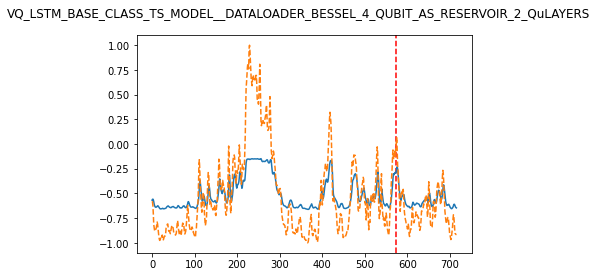

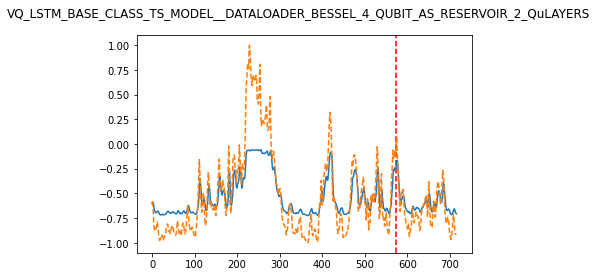

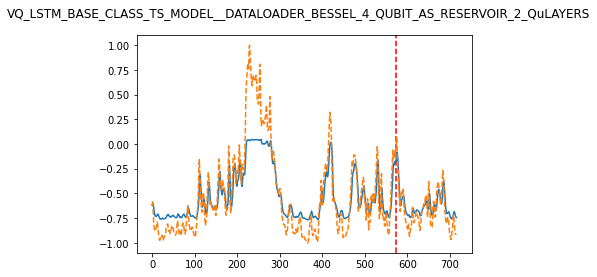

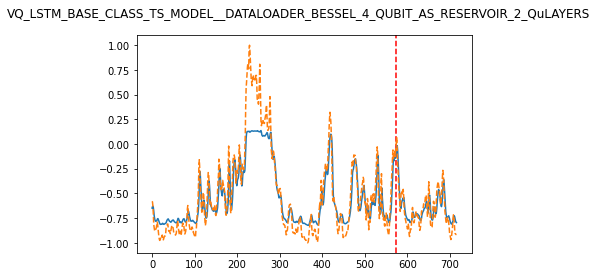

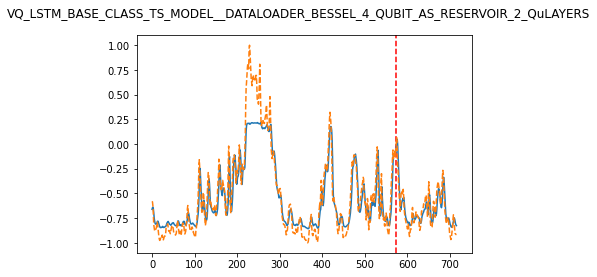

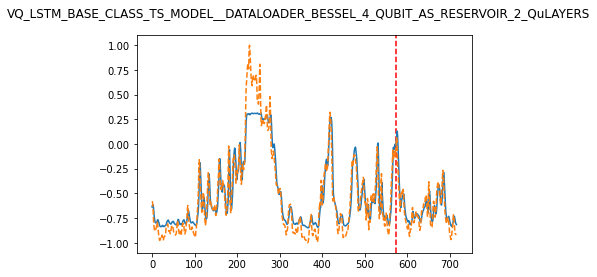

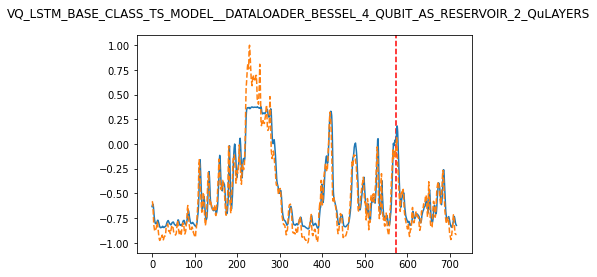

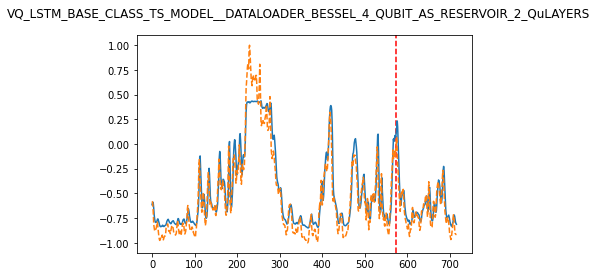

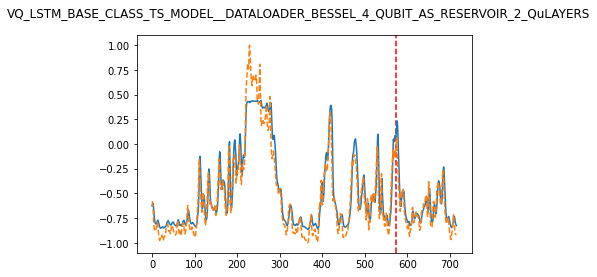

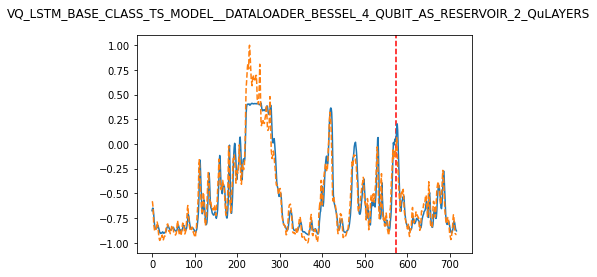

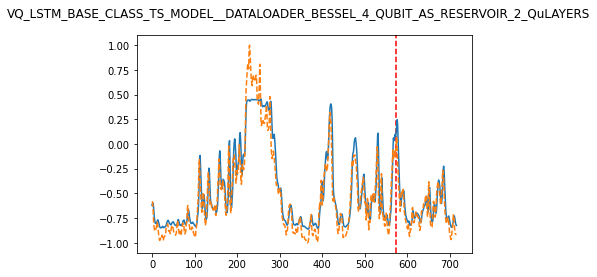

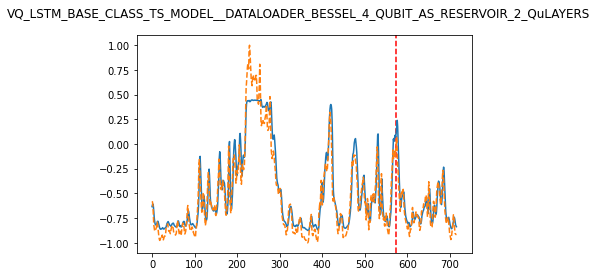

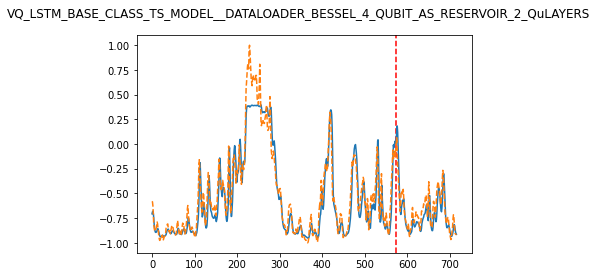

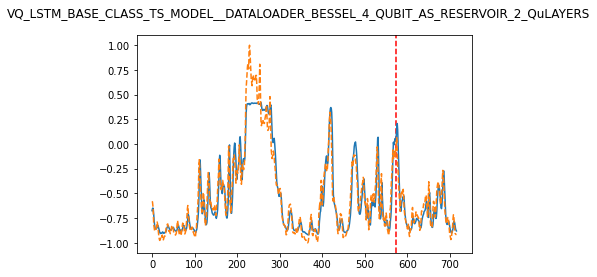

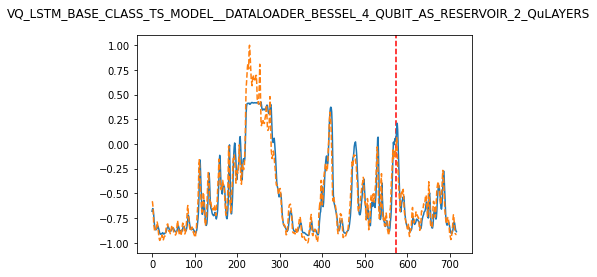

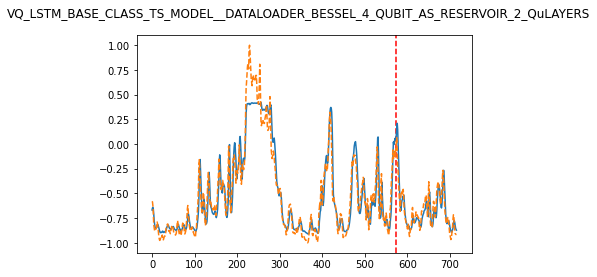

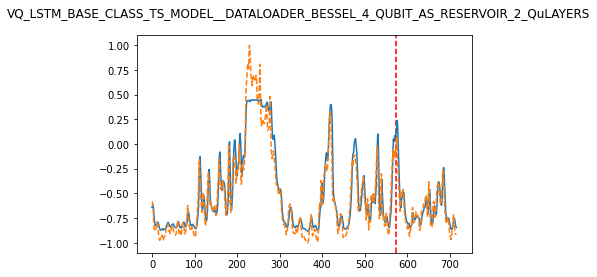

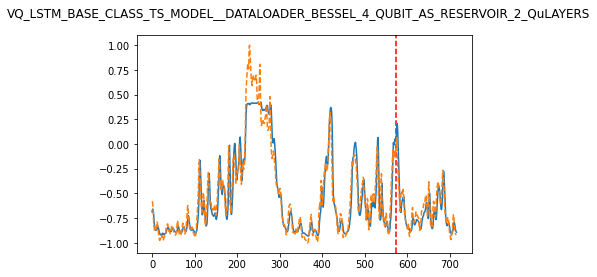

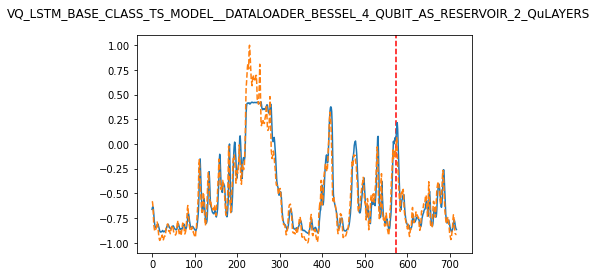

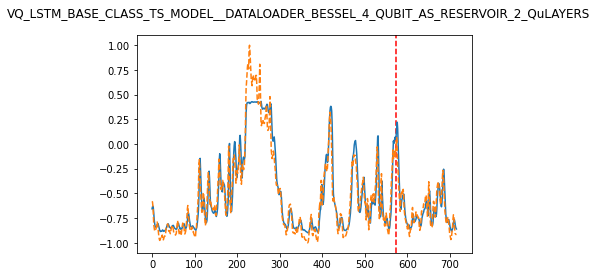

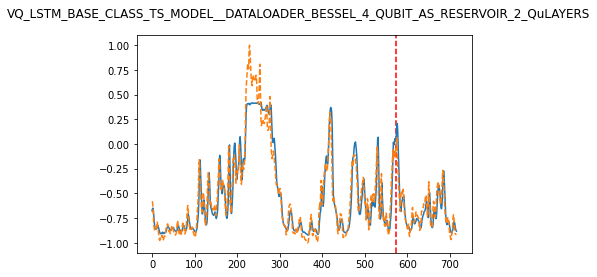

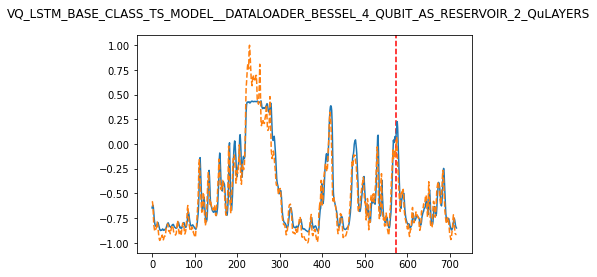

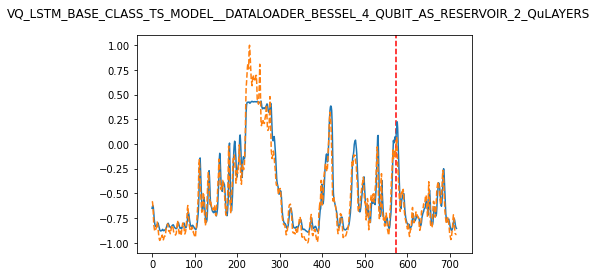

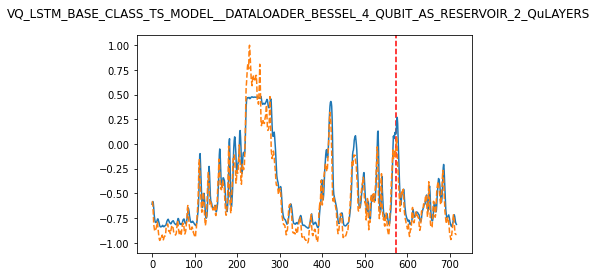

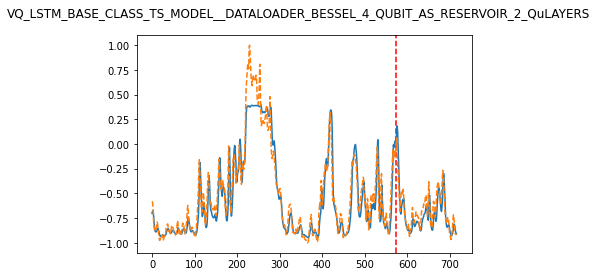

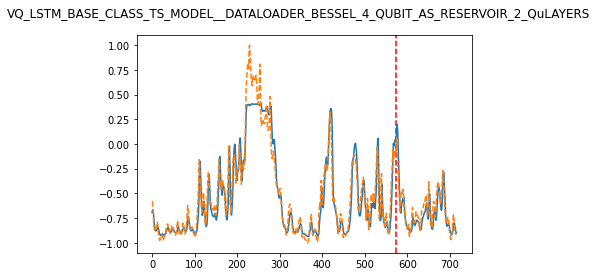

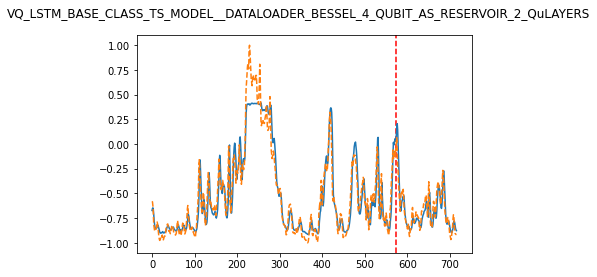

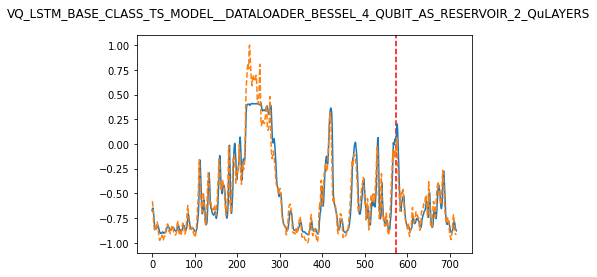

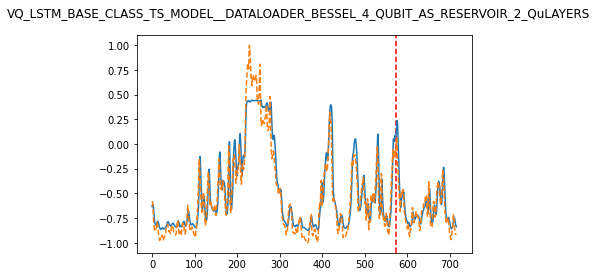

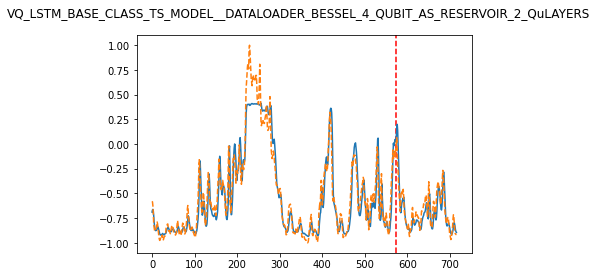

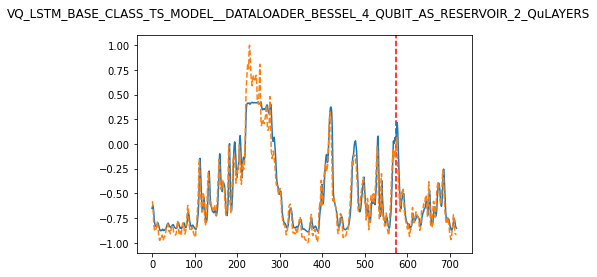

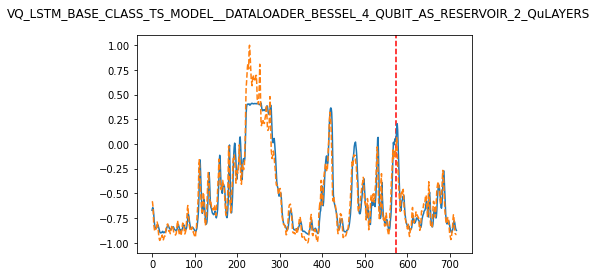

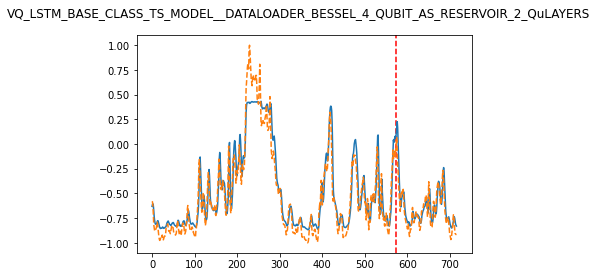

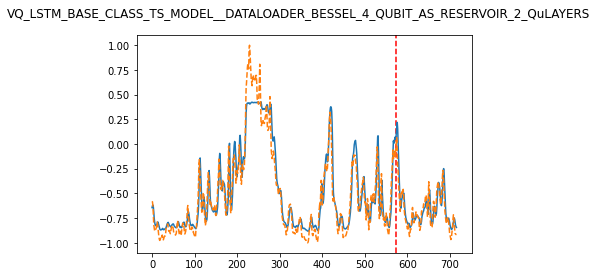

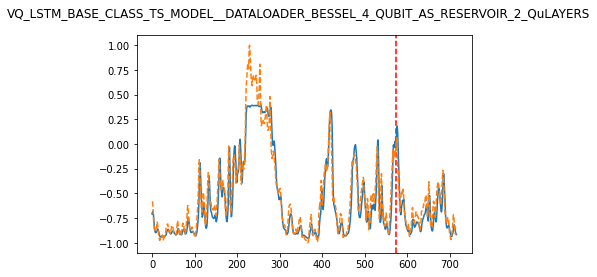

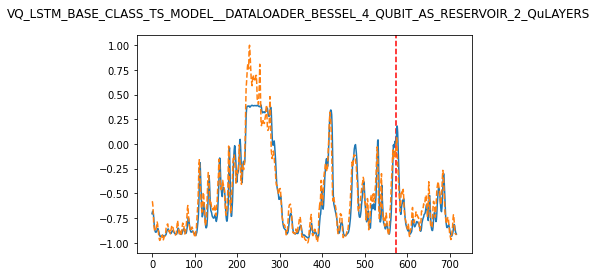

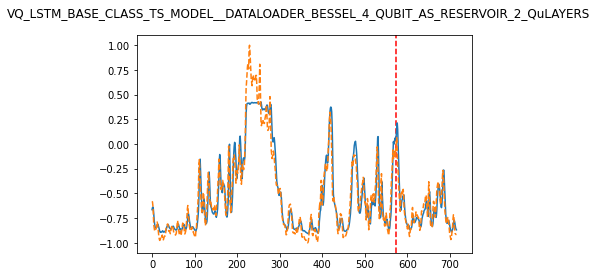

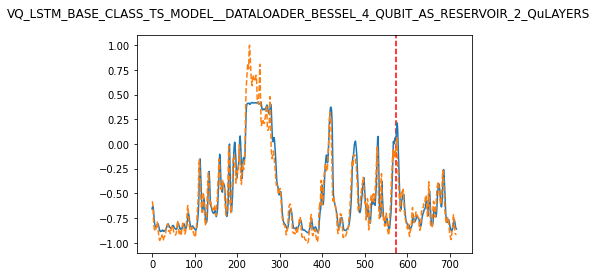

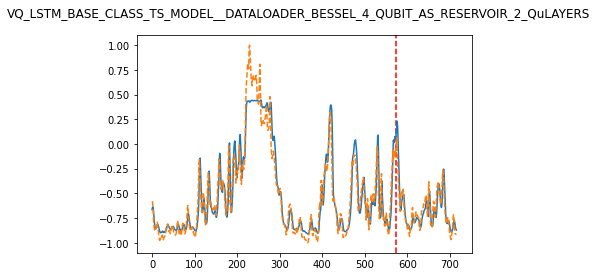

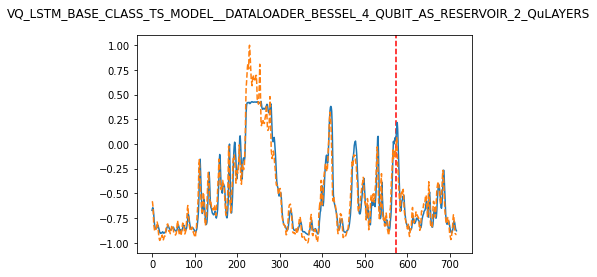

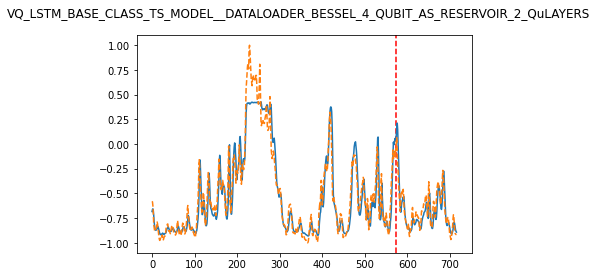

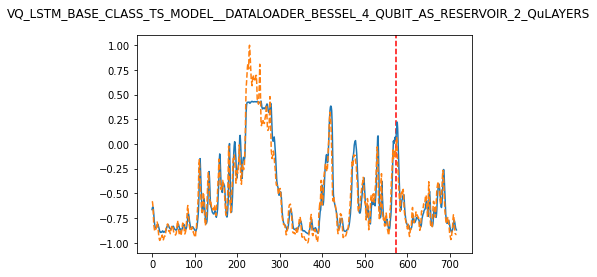

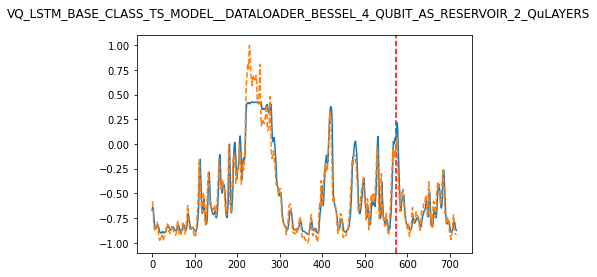

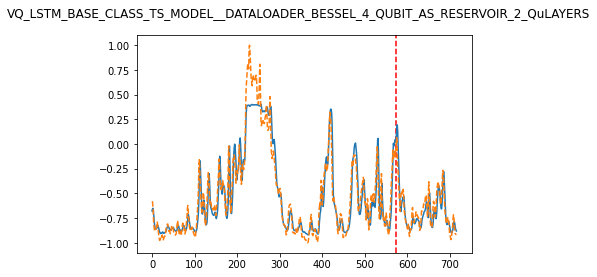

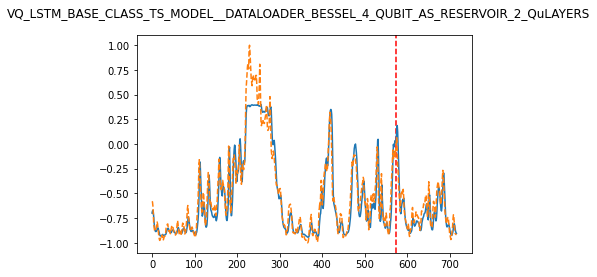

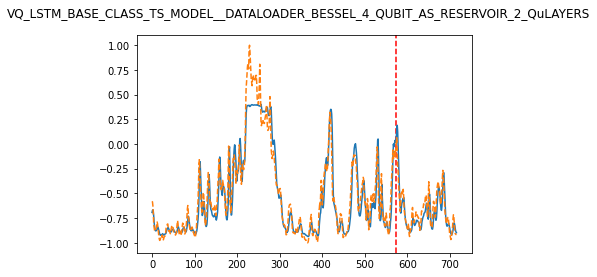

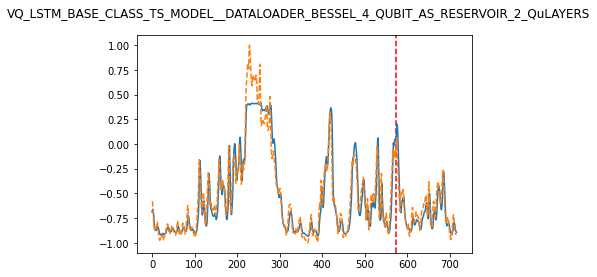

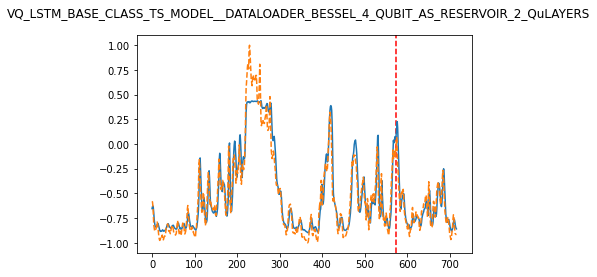

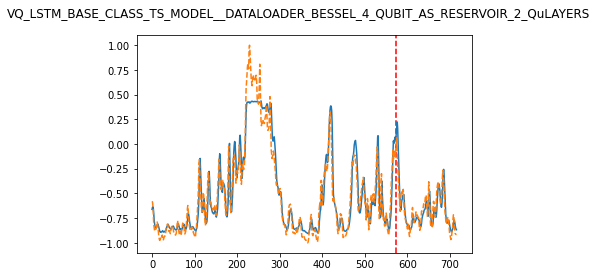

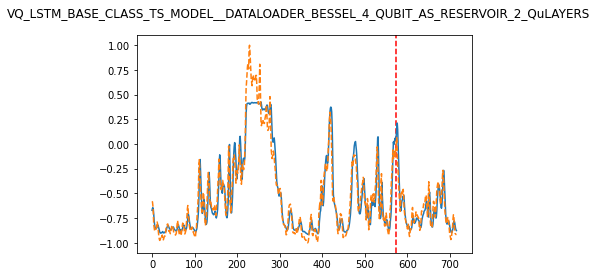

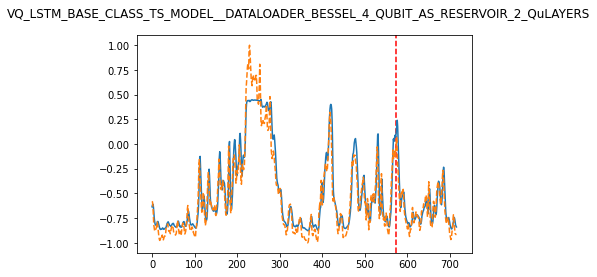

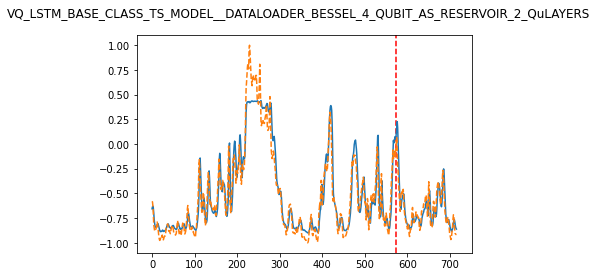

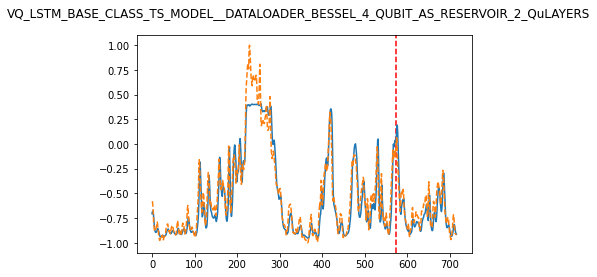

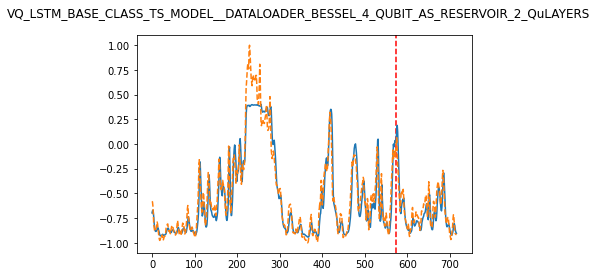

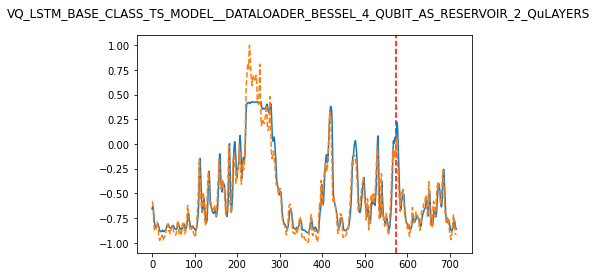

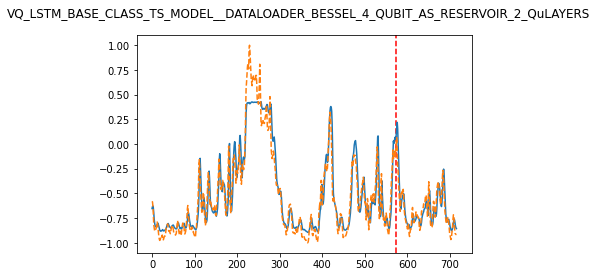

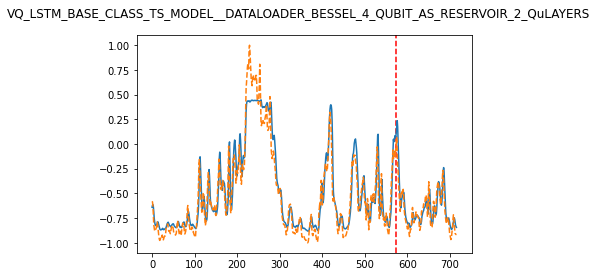

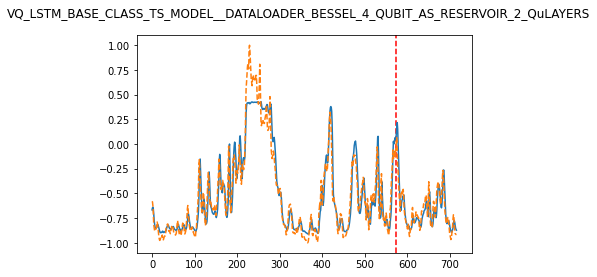

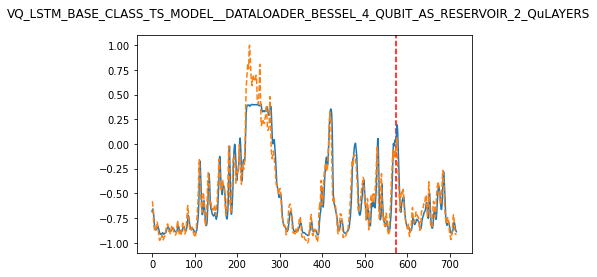

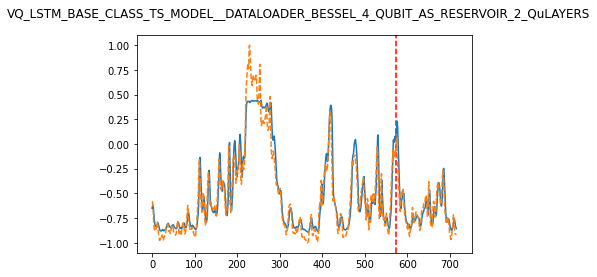

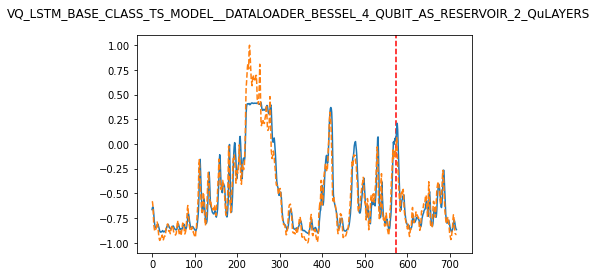

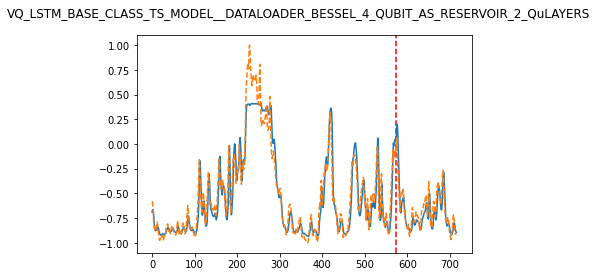

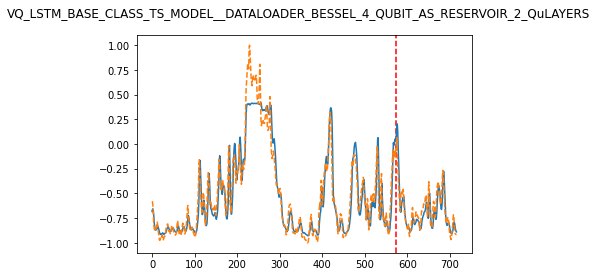

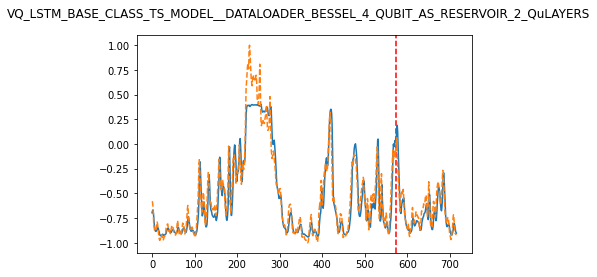

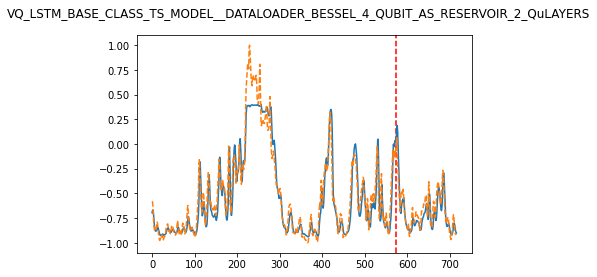

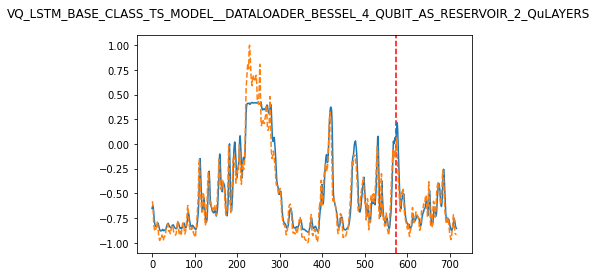

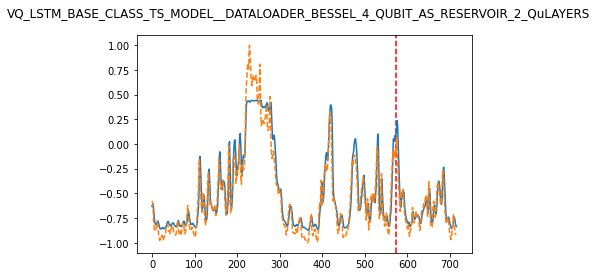

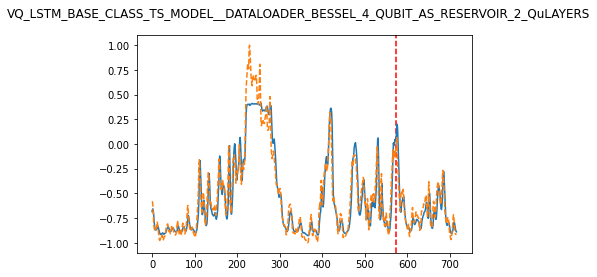

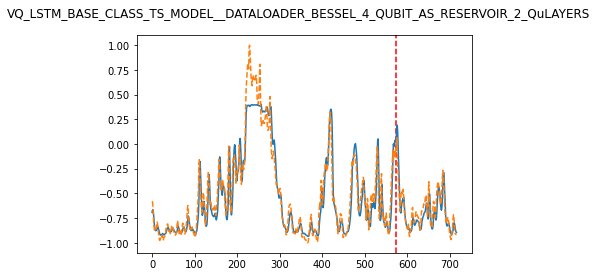

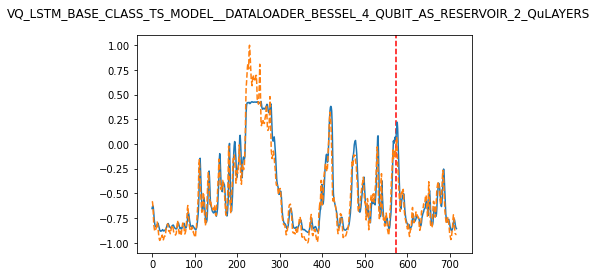

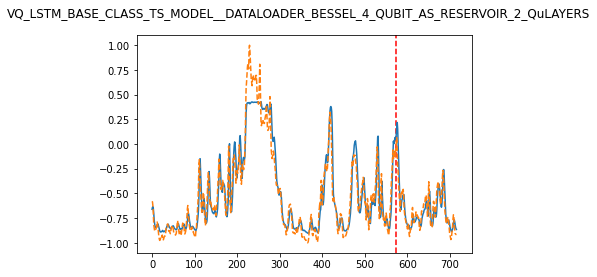

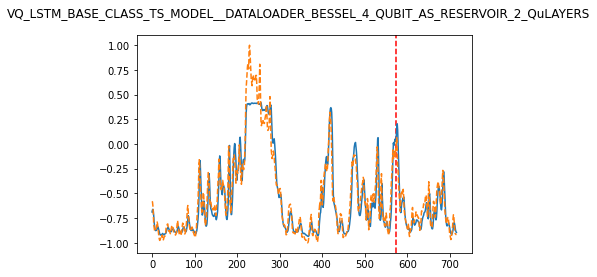

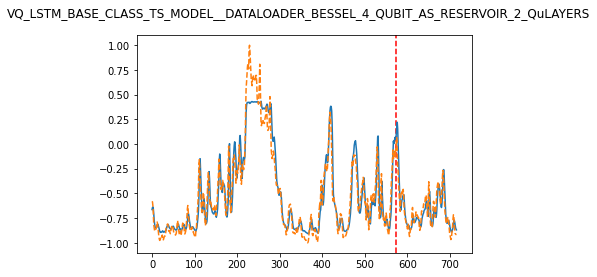

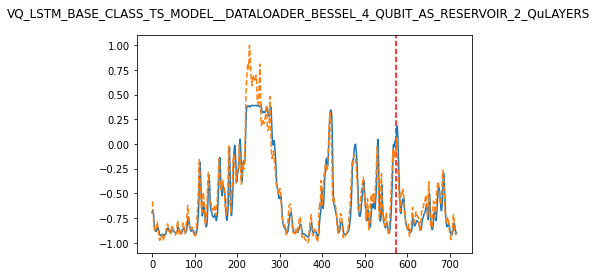

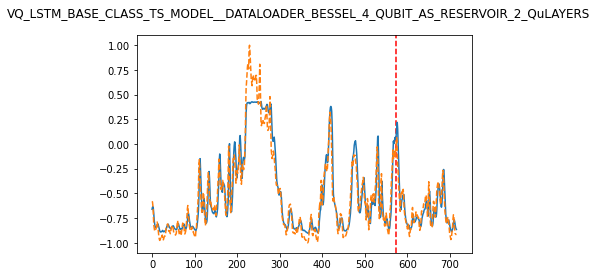

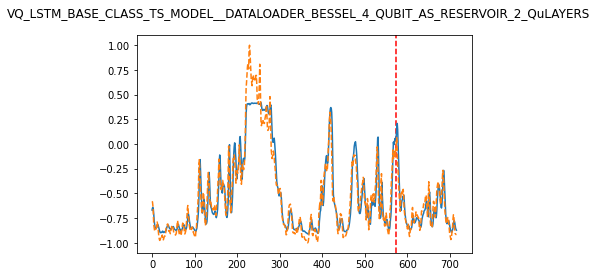

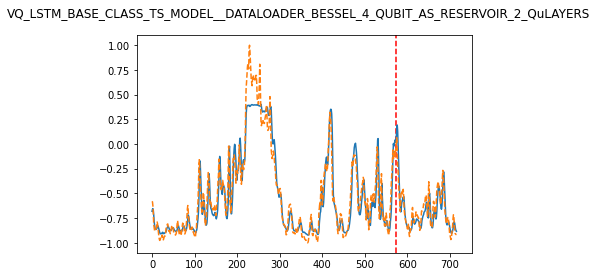

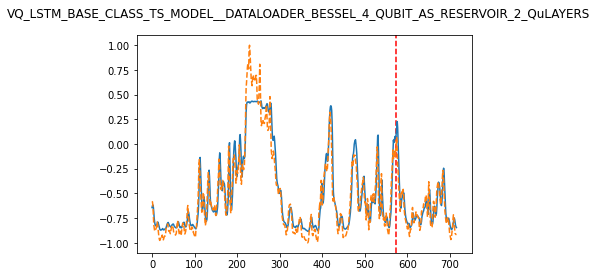

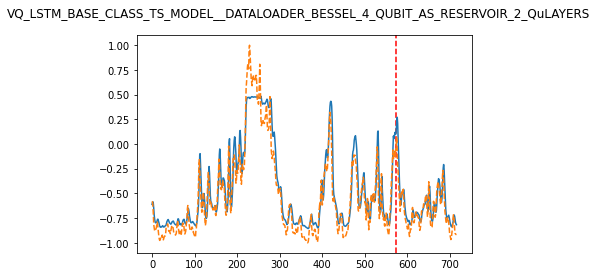

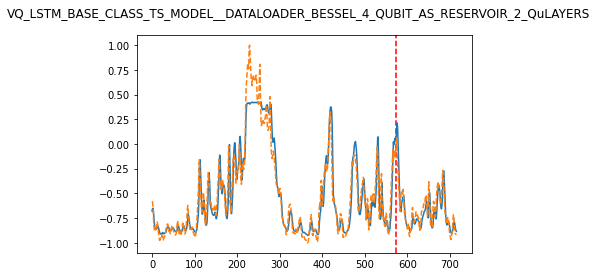

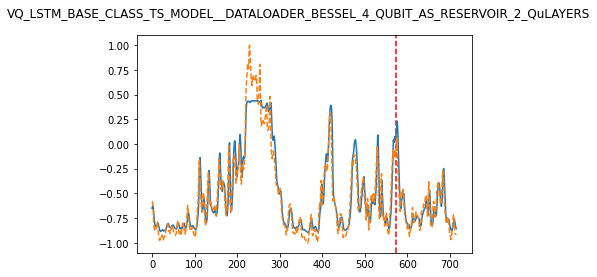

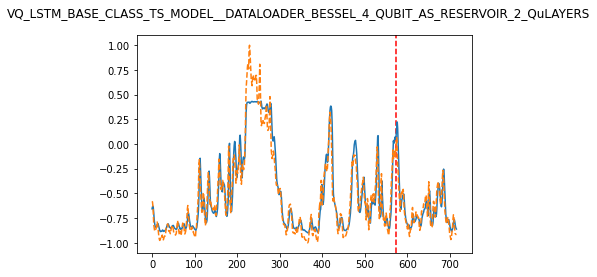

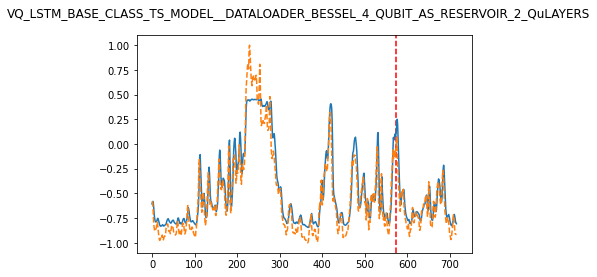

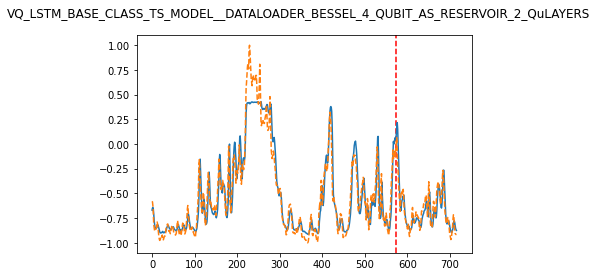

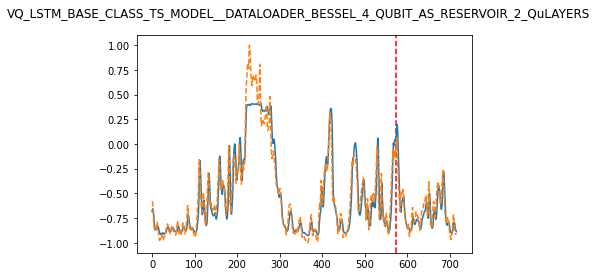

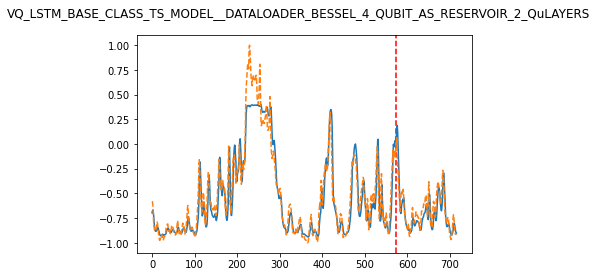

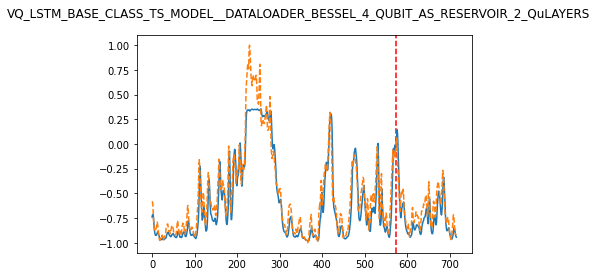

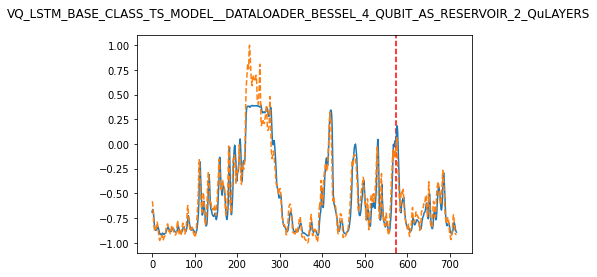

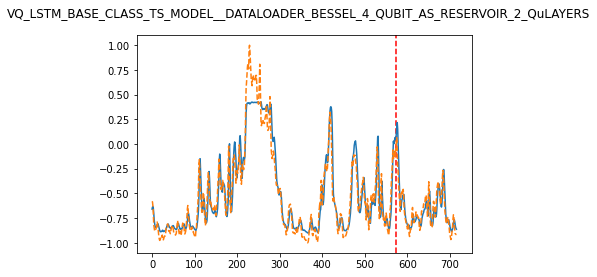

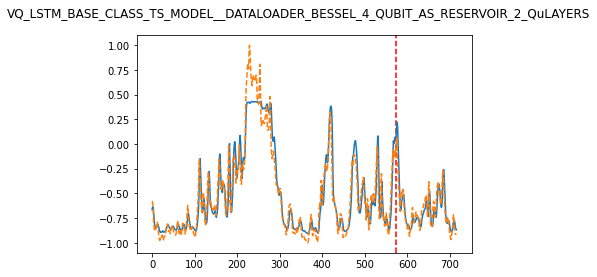

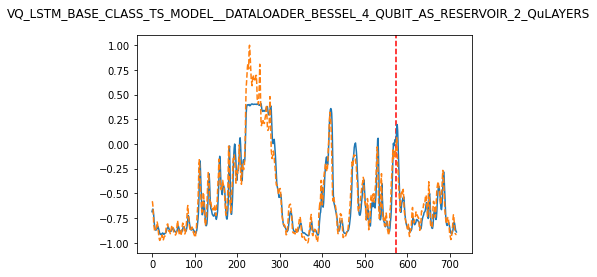

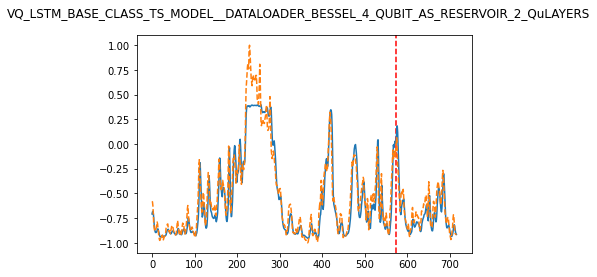

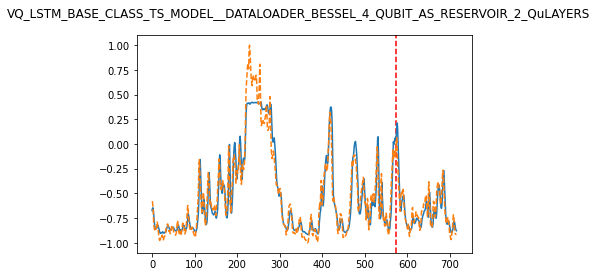

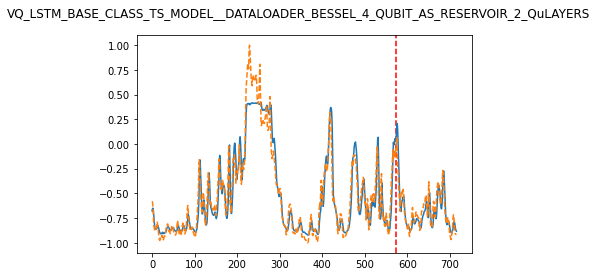

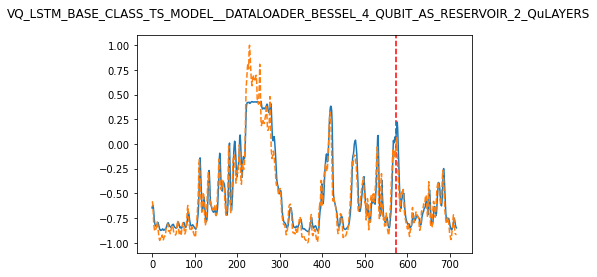

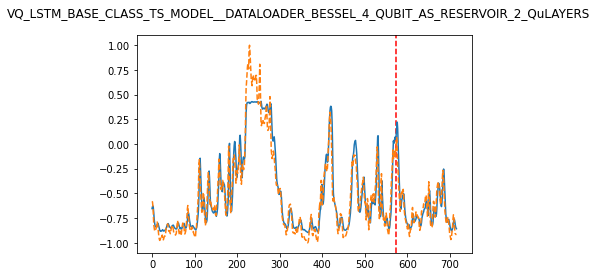

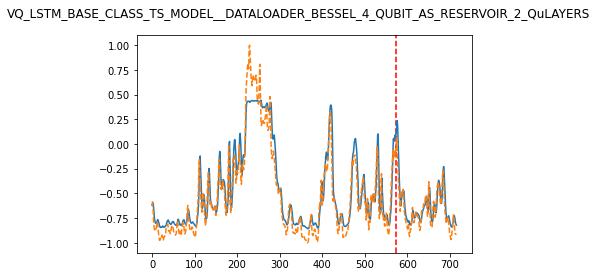

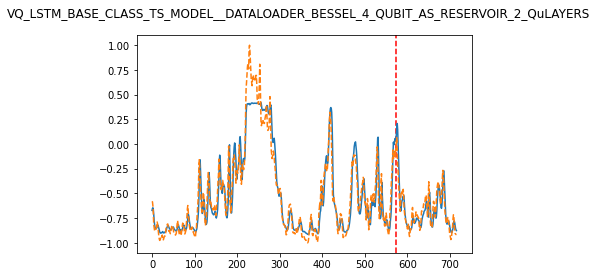

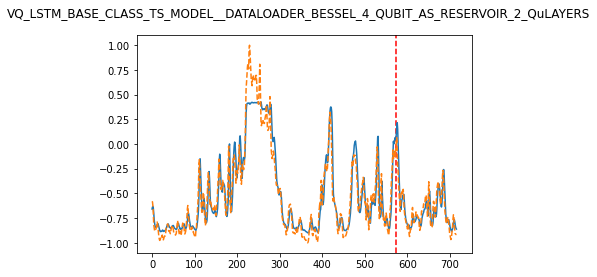

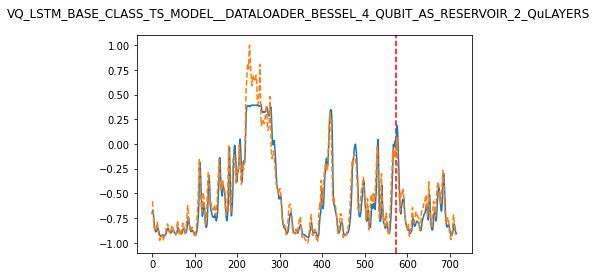

In [2]:
import matplotlib.pyplot as plt

# Saving
import pickle

# Datetime
from datetime import datetime

# PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
# from torch.optim import lr_scheduler
# import torchvision
# from torchvision import datasets, models, transforms

# Pennylane
import pennylane as qml
from pennylane import numpy as np

# sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# pandas
import pandas as pd

# Other tools
import time
import os
import copy

# from VQC_GRAD_META_CONSTRUCT import load_JET_4_var_two

from metaquantum.CircuitComponents import *
from metaquantum import Optimization

# Qiskit
import qiskit
import qiskit.providers.aer.noise as noise

# Custom qiskit noise model
#from ibm_noise_models import thermal_noise_backend, combined_error_noisy_backend, combined_noise_backend_normdist


# Dataset
# from generate_lstm_dataset import get_sine_data
# from data.load_air_passengers import get_air_passenger_data_single_predict
# from data.damped_shm import get_damped_shm_data
from data.bessel_functions import get_bessel_data
# from data.delayed_quantum_control import get_delayed_quantum_control_data
# from data.population_inversion_revised import get_population_inversion_data
# from generate_lstm_dataset import get_sine_data_single_predict
# from data.narma_data_set import get_narma2_data
# from data.narma_generator import get_narma_data

##
# Device auto select
# dtype = torch.cuda.DoubleTensor if torch.cuda.is_available() else torch.DoubleTensor
# device = 'cuda' if torch.cuda.is_available() else 'cpu'


from lstm_base_class import VQLSTM
from lstm_federated_data_prepare import TimeSeriesDataSet


## Training
def MSEcost(VQC, X, Y, h_0, c_0, seq_len):
	"""Cost (error) function to be minimized."""

	# predictions = torch.stack([variational_classifier(var_Q_circuit = var_Q_circuit, var_Q_bias = var_Q_bias, angles=item) for item in X])

	loss = nn.MSELoss()
	output = loss(torch.stack([VQC.forward(vec.reshape(seq_len,1), h_0, c_0).reshape(1,) for vec in X]), Y.reshape(Y.shape[0],1))
	print("LOSS AVG: ",output)
	return output

def train_epoch_full(opt, VQC, data, h_0, c_0, seq_len, batch_size):
	losses = []
	time_series_data_loader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True)

	for X_train_batch, Y_train_batch in time_series_data_loader:

		since_batch = time.time()
		opt.zero_grad()
		print("CALCULATING LOSS...")
		loss = MSEcost(VQC = VQC, X = X_train_batch, Y = Y_train_batch, h_0 = h_0, c_0 = c_0, seq_len = seq_len)
		print("BACKWARD..")
		loss.backward()
		losses.append(loss.data.cpu().numpy())
		opt.step()
# 		print("LOSS IN CLOSURE: ", loss)
		print("FINISHED OPT.")
		print("Batch time: ", time.time() - since_batch)

	losses = np.array(losses)
	return losses.mean()


def saving(exp_name, exp_index, train_len, iteration_list, train_loss_list, test_loss_list, model, simulation_result, ground_truth):
	file_name = exp_name + "_NO_" + str(exp_index) + "_Epoch_" + str(iteration_list[-1])
	saved_simulation_truth = {
	"simulation_result" : simulation_result,
	"ground_truth" : ground_truth
	}

	if not os.path.exists(exp_name):
		os.makedirs(exp_name)

	# Save the train loss list
	with open(exp_name + "/" + file_name + "_TRAINING_LOST" + ".txt", "wb") as fp:
		pickle.dump(train_loss_list, fp)

	# Save the test loss list
	with open(exp_name + "/" + file_name + "_TESTING_LOST" + ".txt", "wb") as fp:
		pickle.dump(test_loss_list, fp)

	# Save the simulation result
	with open(exp_name + "/" + file_name + "_SIMULATION_RESULT" + ".txt", "wb") as fp:
		pickle.dump(saved_simulation_truth, fp)

	# Save the model parameters
	torch.save(model.state_dict(), exp_name + "/" +  file_name + "_torch_model.pth")

	# Plot
	plotting_data(exp_name, exp_index, file_name, iteration_list, train_loss_list, test_loss_list)
	plotting_simulation(exp_name, exp_index, file_name, train_len, simulation_result, ground_truth)

	return


def plotting_data(exp_name, exp_index, file_name, iteration_list, train_loss_list, test_loss_list):
	# Plot train and test loss
	fig, ax = plt.subplots()
	# plt.yscale('log')
	ax.plot(iteration_list, train_loss_list, '-b', label='Training Loss')
	ax.plot(iteration_list, test_loss_list, '-r', label='Testing Loss')
	leg = ax.legend();

	ax.set(xlabel='Epoch', 
		   title=exp_name)
	fig.savefig(exp_name + "/" + file_name + "_" + "loss" + "_"+ datetime.now().strftime("NO%Y%m%d%H%M%S") + ".pdf", format='pdf')
	plt.clf()

	return

def plotting_simulation(exp_name, exp_index, file_name, train_len, simulation_result, ground_truth):
	# Plot the simulation
	plt.axvline(x=train_len, c='r', linestyle='--')
	plt.plot(simulation_result, '-')
	plt.plot(ground_truth.detach().numpy(), '--')
	plt.suptitle(exp_name)
	# savfig can only be placed BEFORE show()
	plt.savefig(exp_name + "/" + file_name + "_" + "simulation" + "_"+ datetime.now().strftime("NO%Y%m%d%H%M%S") + ".pdf", format='pdf')
	return

#



def main():

	dtype = torch.DoubleTensor
	device = 'cpu'


	qdevice = "default.qubit" 
	# qdevice = "qulacs.simulator"

	# gpu_q = True
	gpu_q = False

	##
	duplicate_time_of_input = 1

	lstm_input_size = 1
	lstm_hidden_size = 3
	lstm_cell_cat_size = lstm_input_size + lstm_hidden_size
	lstm_internal_size = 4
	lstm_output_size = 4  
	lstm_cell_num_layers = 2 
	lstm_num_qubit = 4

	as_reservoir = True

	use_qiskit_noise_model = False


	dev = None

	if use_qiskit_noise_model:
		noise_model = combined_noise_backend_normdist(num_qubits = lstm_num_qubit)
		dev = qml.device('qiskit.aer', wires=lstm_num_qubit, noise_model=noise_model)

	else:
		dev = qml.device("lightning.qubit", wires = lstm_num_qubit)


	# Initialize the model
	model = VQLSTM(lstm_input_size = lstm_input_size, 
		lstm_hidden_size = lstm_hidden_size,
		lstm_output_size = lstm_output_size,
		lstm_num_qubit = lstm_num_qubit,
		lstm_cell_cat_size = lstm_cell_cat_size,
		lstm_cell_num_layers = lstm_cell_num_layers,
		lstm_internal_size = lstm_internal_size,
		duplicate_time_of_input = duplicate_time_of_input,
		as_reservoir = as_reservoir,
		single_y = True,
		output_all_h = False,
		qdevice = qdevice,
		dev = dev,
		gpu_q = gpu_q).double()

	# Load the data

	#x, y = get_bessel_data()
    
	data = pd.read_excel('data_W_chen.xlsx')

	data = data['Actual Generation [GWh]'].values
	len_train = 0.8
	window_size = 4
	train = data[:int(len_train*len(data))].reshape(-1,1)
	test = data[int(len_train*len(data))-window_size:].reshape(-1,1)

	scaler = MinMaxScaler(feature_range=(-1,1))
	scaler.fit(train)
	train = scaler.transform(train)
	test = scaler.transform(test)

	prediction_horizon=1


	def split_sequence(sequence, n_steps, prediction_horizon):
		X, y = list(), list()
		for i in range(len(sequence)):
			# find the end of this pattern
			end_ix = i + n_steps
			# check if we are beyond the sequence
			if end_ix+prediction_horizon-1 > len(sequence)-1:
				break
			# gather input and output parts of the pattern
			seq_x, seq_y = sequence[i:end_ix], sequence[end_ix+prediction_horizon-1]
			X.append(seq_x)
			y.append(seq_y)
		return np.array(X), np.array(y)

	x_train, y_train = split_sequence(train, window_size, prediction_horizon)
	x_test, y_test = split_sequence(test, window_size, prediction_horizon)
    
	x_train = torch.Tensor(x_train).type(dtype)
	y_train = torch.Tensor(y_train).type(dtype)
	x_test = torch.Tensor(x_test).type(dtype)
	y_test = torch.Tensor(y_test).type(dtype)
    
	train_data = TimeSeriesDataSet(x_train, y_train)

	test_data = TimeSeriesDataSet(x_test, y_test)
    
	print(x_train.shape,x_test.shape)
	print(y_train.shape,y_test.shape)
	x = torch.cat((x_train,x_test)).type(dtype)
	y = torch.cat((y_train,y_test)).type(dtype)
	print(x.shape,y.shape)
    
	'''
	num_for_train_set = int(0.67 * len(x))

	x_train = x[:num_for_train_set].type(dtype)
	y_train = y[:num_for_train_set].type(dtype)

	train_data = TimeSeriesDataSet(x_train, y_train)

	x_test = x[num_for_train_set:].type(dtype)
	y_test = y[num_for_train_set:].type(dtype)

	test_data = TimeSeriesDataSet(x_test, y_test)
	'''

	print("x_train: ", x_train)
	print("x_test: ", x_test)


	h_0 = torch.zeros(lstm_hidden_size,).type(dtype)
	c_0 = torch.zeros(lstm_internal_size,).type(dtype)

	print("First data: ", x_train[0])
	print("First target: ", y_train[0])
	# first_run_h, first_run_c = model.forward(x_train[0].reshape(4,1), h_0, c_0)
	first_run = model.forward(x_train[0].reshape(4,1), h_0, c_0)
	# print("Output of first_run_h: ", first_run_h)
	# print("Output of first_run_c: ", first_run_c)


	exp_name = "VQ_LSTM_BASE_CLASS_TS_MODEL__DATALOADER_BESSEL_{}_QUBIT".format(lstm_num_qubit)


	if as_reservoir:
		exp_name += "_AS_RESERVOIR"

	if use_qiskit_noise_model:
		exp_name += "_QISKIT_NOISE"


	exp_name += "_{}_QuLAYERS".format(lstm_cell_num_layers)

	exp_index = 2
	train_len = len(x_train)

	opt = torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.99, eps=1e-08, weight_decay=0, momentum=0, centered=False)
	train_loss_for_all_epoch = []
	test_loss_for_all_epoch = []
	iteration_list = []
	for i in range(100):
		print(f'\nEpoch {i+1}')
		iteration_list.append(i + 1)
		c_0 = torch.zeros(lstm_internal_size,).type(dtype)
		h_0 = torch.zeros(lstm_hidden_size,).type(dtype)


		train_loss_epoch = train_epoch_full(opt = opt, VQC = model, data = train_data, h_0 = h_0, c_0 = c_0, seq_len = 4,batch_size = 10)
		print("c_0: ", c_0)
		print("h_0: ", h_0)
		test_loss = MSEcost(VQC = model, X = x_test, Y = y_test, h_0 = h_0, c_0 = c_0, seq_len = 4)
		print("TEST LOSS: ", test_loss)

		# train_loss_for_all_epoch.append(train_loss_epoch)
		# test_loss_for_all_epoch.append(test_loss)
		train_loss_for_all_epoch.append(train_loss_epoch.numpy())
		test_loss_for_all_epoch.append(test_loss.detach().numpy())

		plot_each_epoch = True
		if plot_each_epoch == True:
			total_res = None
			ground_truth_y = None
			if device == 'cuda':
				total_res = torch.stack([model.forward(vec.reshape(4,1), h_0, c_0).reshape(1,) for vec in x.type(dtype)]).detach().cpu().numpy()
				ground_truth_y = y.clone().detach().cpu()
			else:
				total_res = torch.stack([model.forward(vec.reshape(4,1), h_0, c_0).reshape(1,) for vec in x.type(dtype)]).detach().numpy()
				ground_truth_y = y.clone().detach()

			saving(
				exp_name = exp_name, 
				exp_index = exp_index, 
				train_len = train_len, 
				iteration_list = iteration_list, 
				train_loss_list = train_loss_for_all_epoch, 
				test_loss_list = test_loss_for_all_epoch, 
				model = model, 
				simulation_result = total_res, 
				ground_truth = ground_truth_y)

	return




if __name__ == '__main__':
	main()